#GRIP: The Sparks Foundation
#Data Science and Business Analytics Internship

#Author: Manos Chandra Roy

### *Task 3: Exploratory Data Analysis Retail*

As a business manager, my task is to find out the weak areas where I can work to make more profit.

Dataset: https://bit.ly/3i4rbWl


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Loading the dataset
data = pd.read_csv("/content/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Checking missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#Checking the duplicity
data.duplicated().sum()

17

In [9]:
#Dropping duplicate data
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
#Deleting the variable
col=['Postal Code']
df=data.drop(columns=col,axis=1)

In [12]:
#Correlation between variables
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [13]:
#Covariance of columns
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis (EDA)

***Data Visualization***

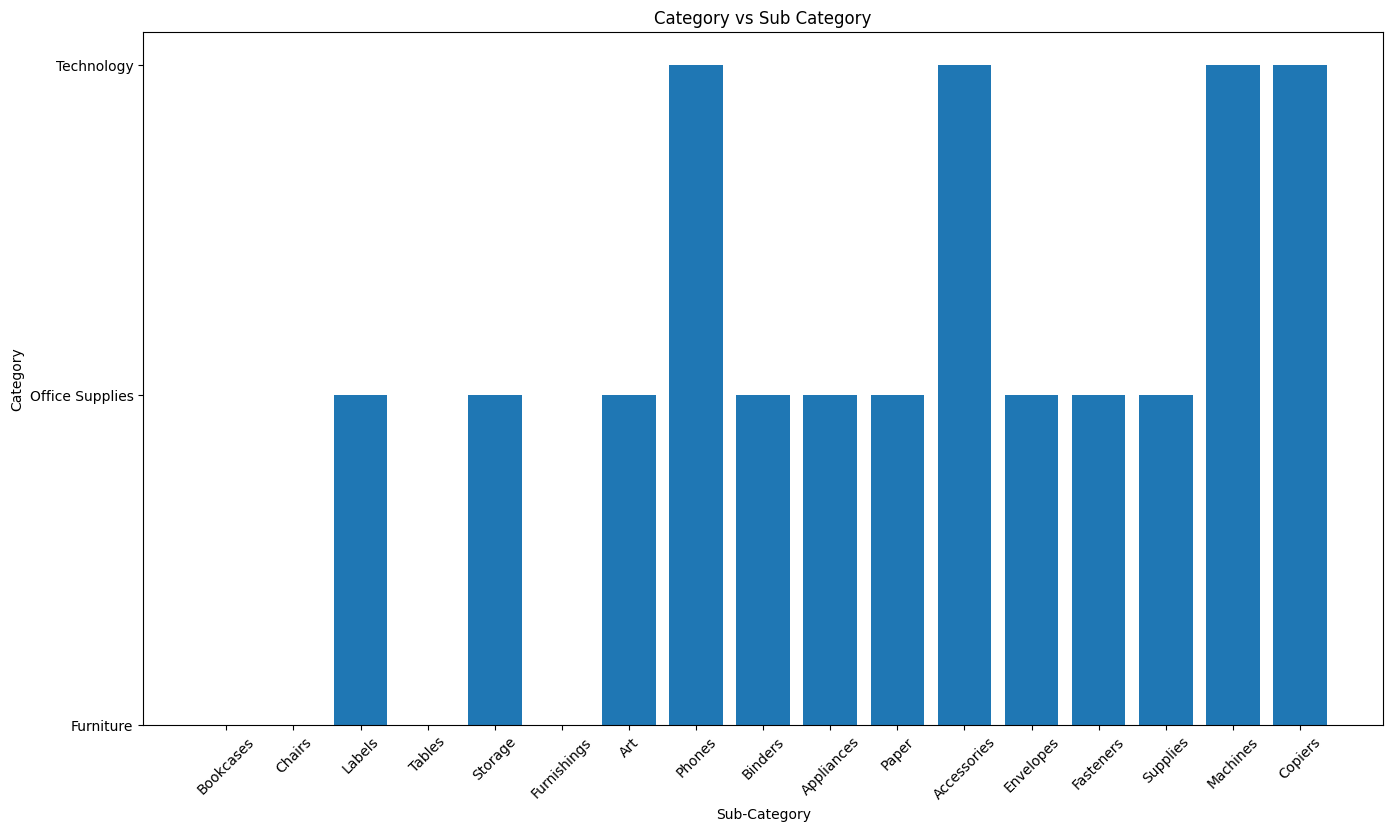

In [15]:
plt.figure(figsize=(16,9))
plt.bar('Sub-Category','Category',data=df)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

In [16]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


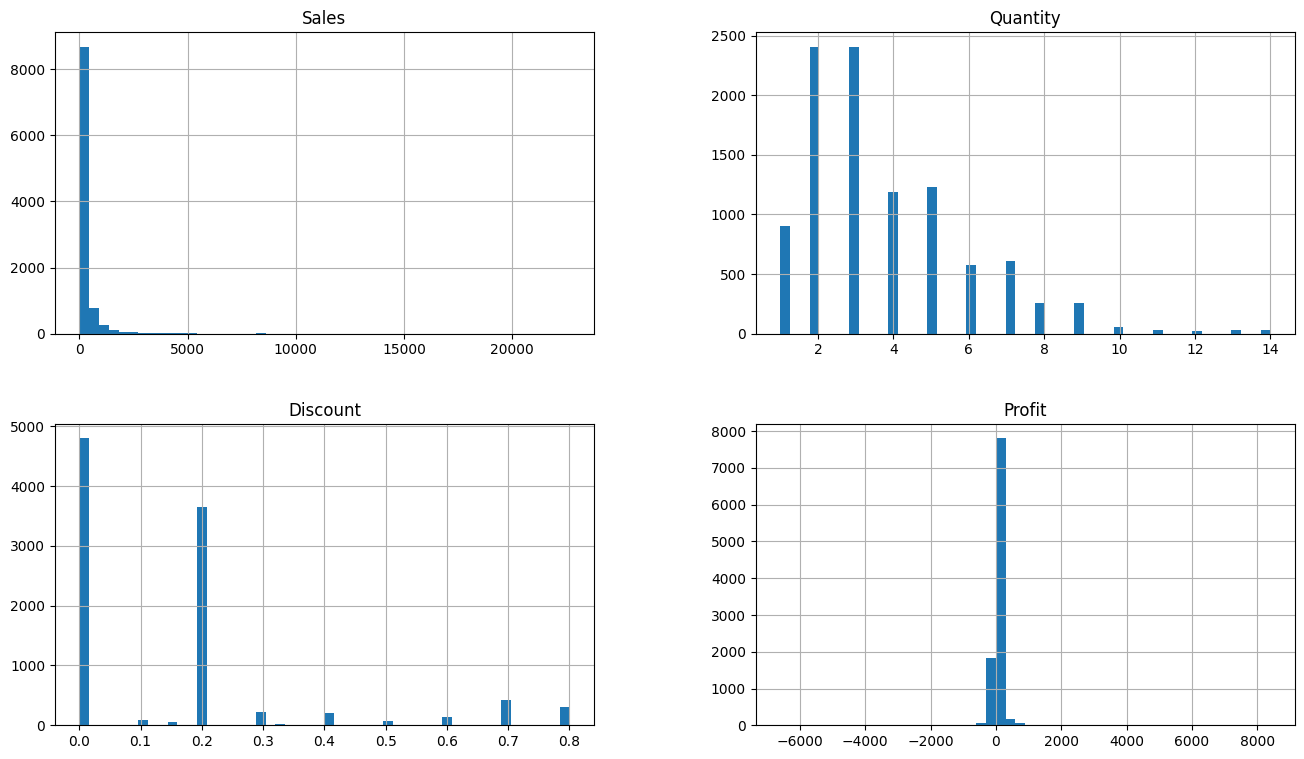

In [17]:
df.hist(bins=50,figsize=(16,9))
plt.show()

In [18]:
#Counting total repetable states
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

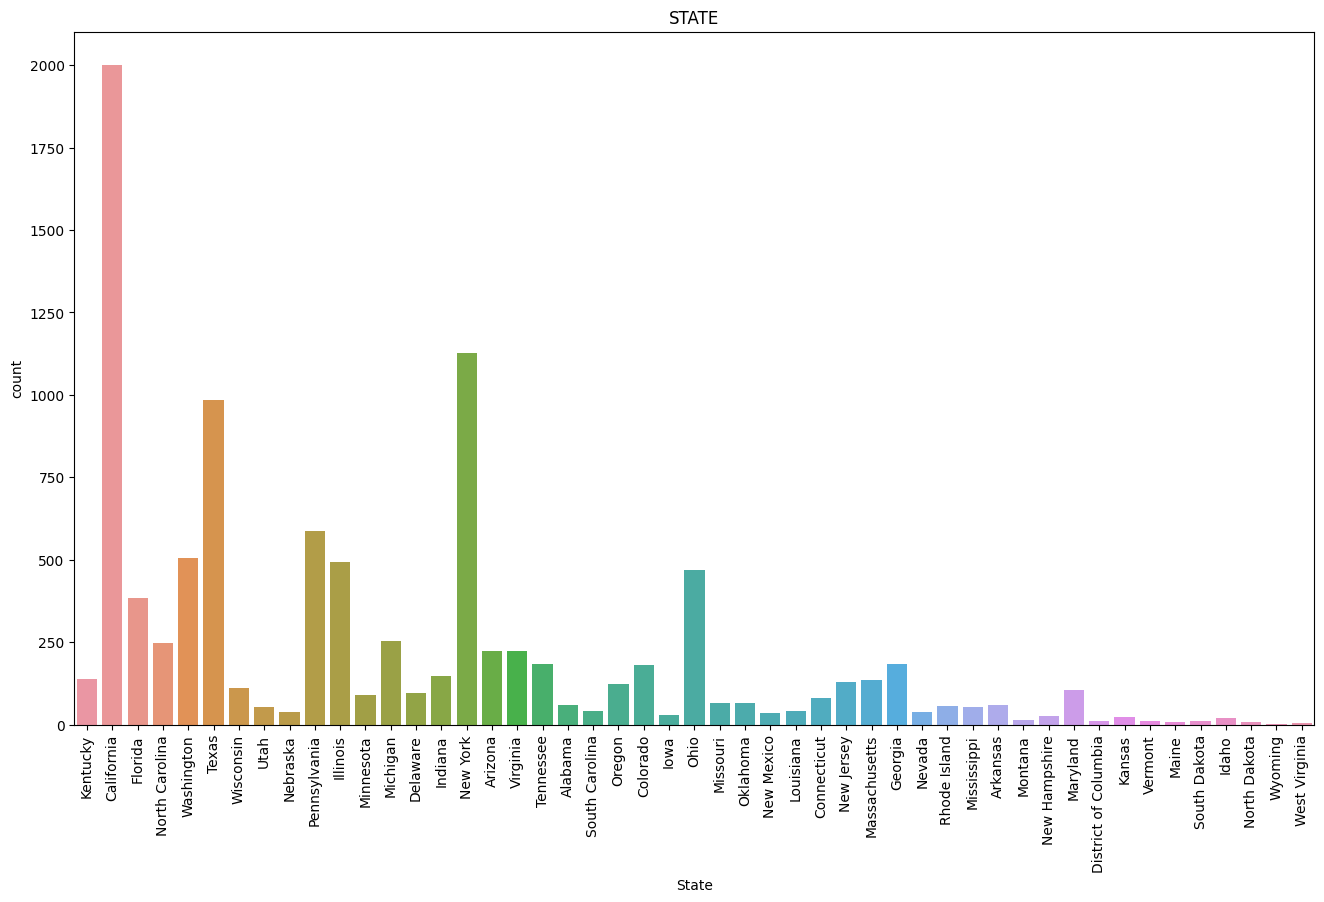

In [19]:
plt.figure(figsize=(16,9))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

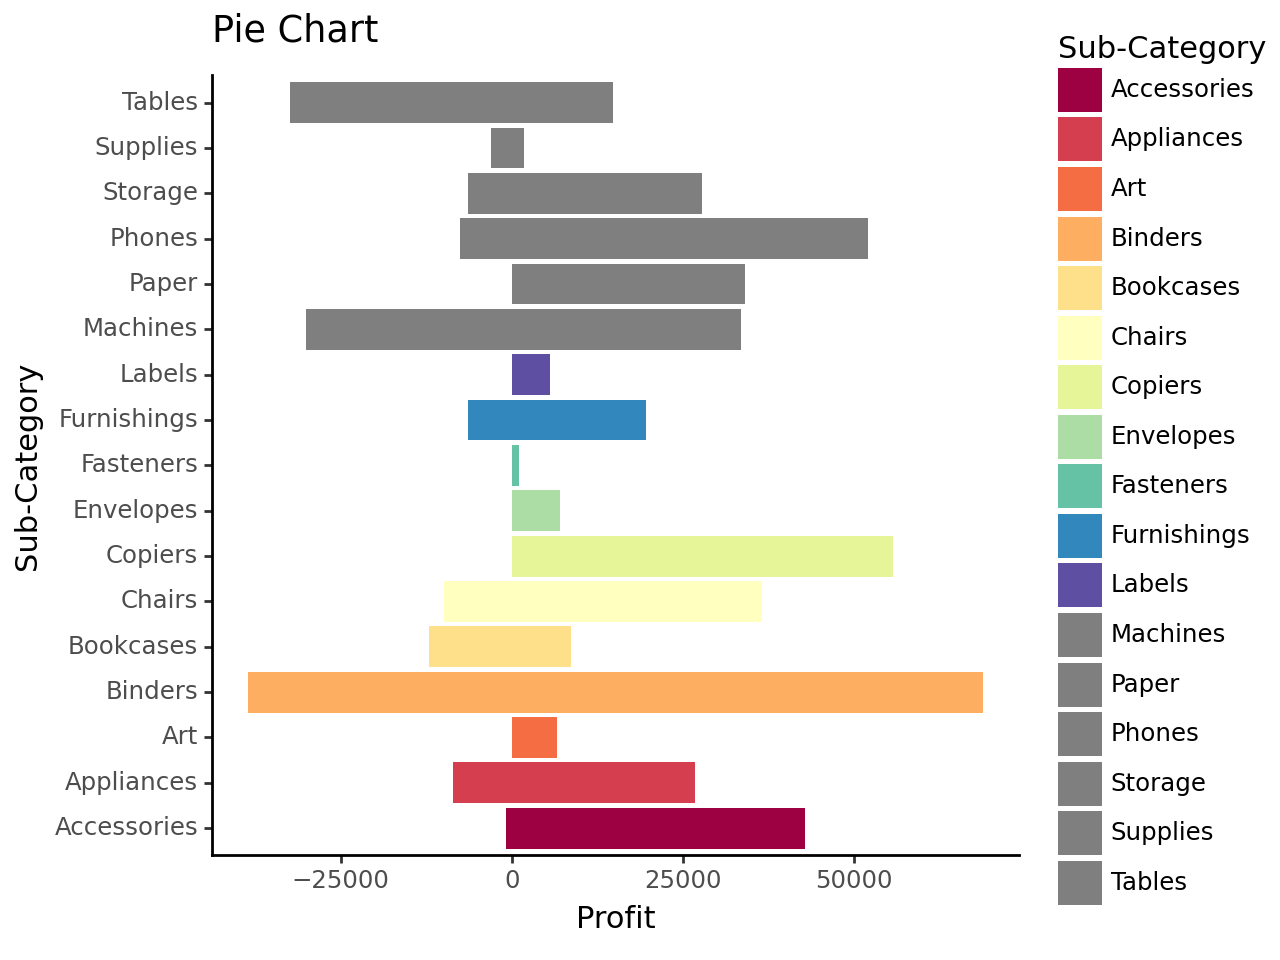

<Figure Size: (640 x 480)>

In [20]:
Profit_plot = (ggplot(data, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

## The above Pie Chart illustrates the profit and loss of each and every subcategories. Here, we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories. (Till now we can't say that what the reason is. It may be because of discounts given on binders subcategory)

*Next, Suffering from highest loss is machines.*

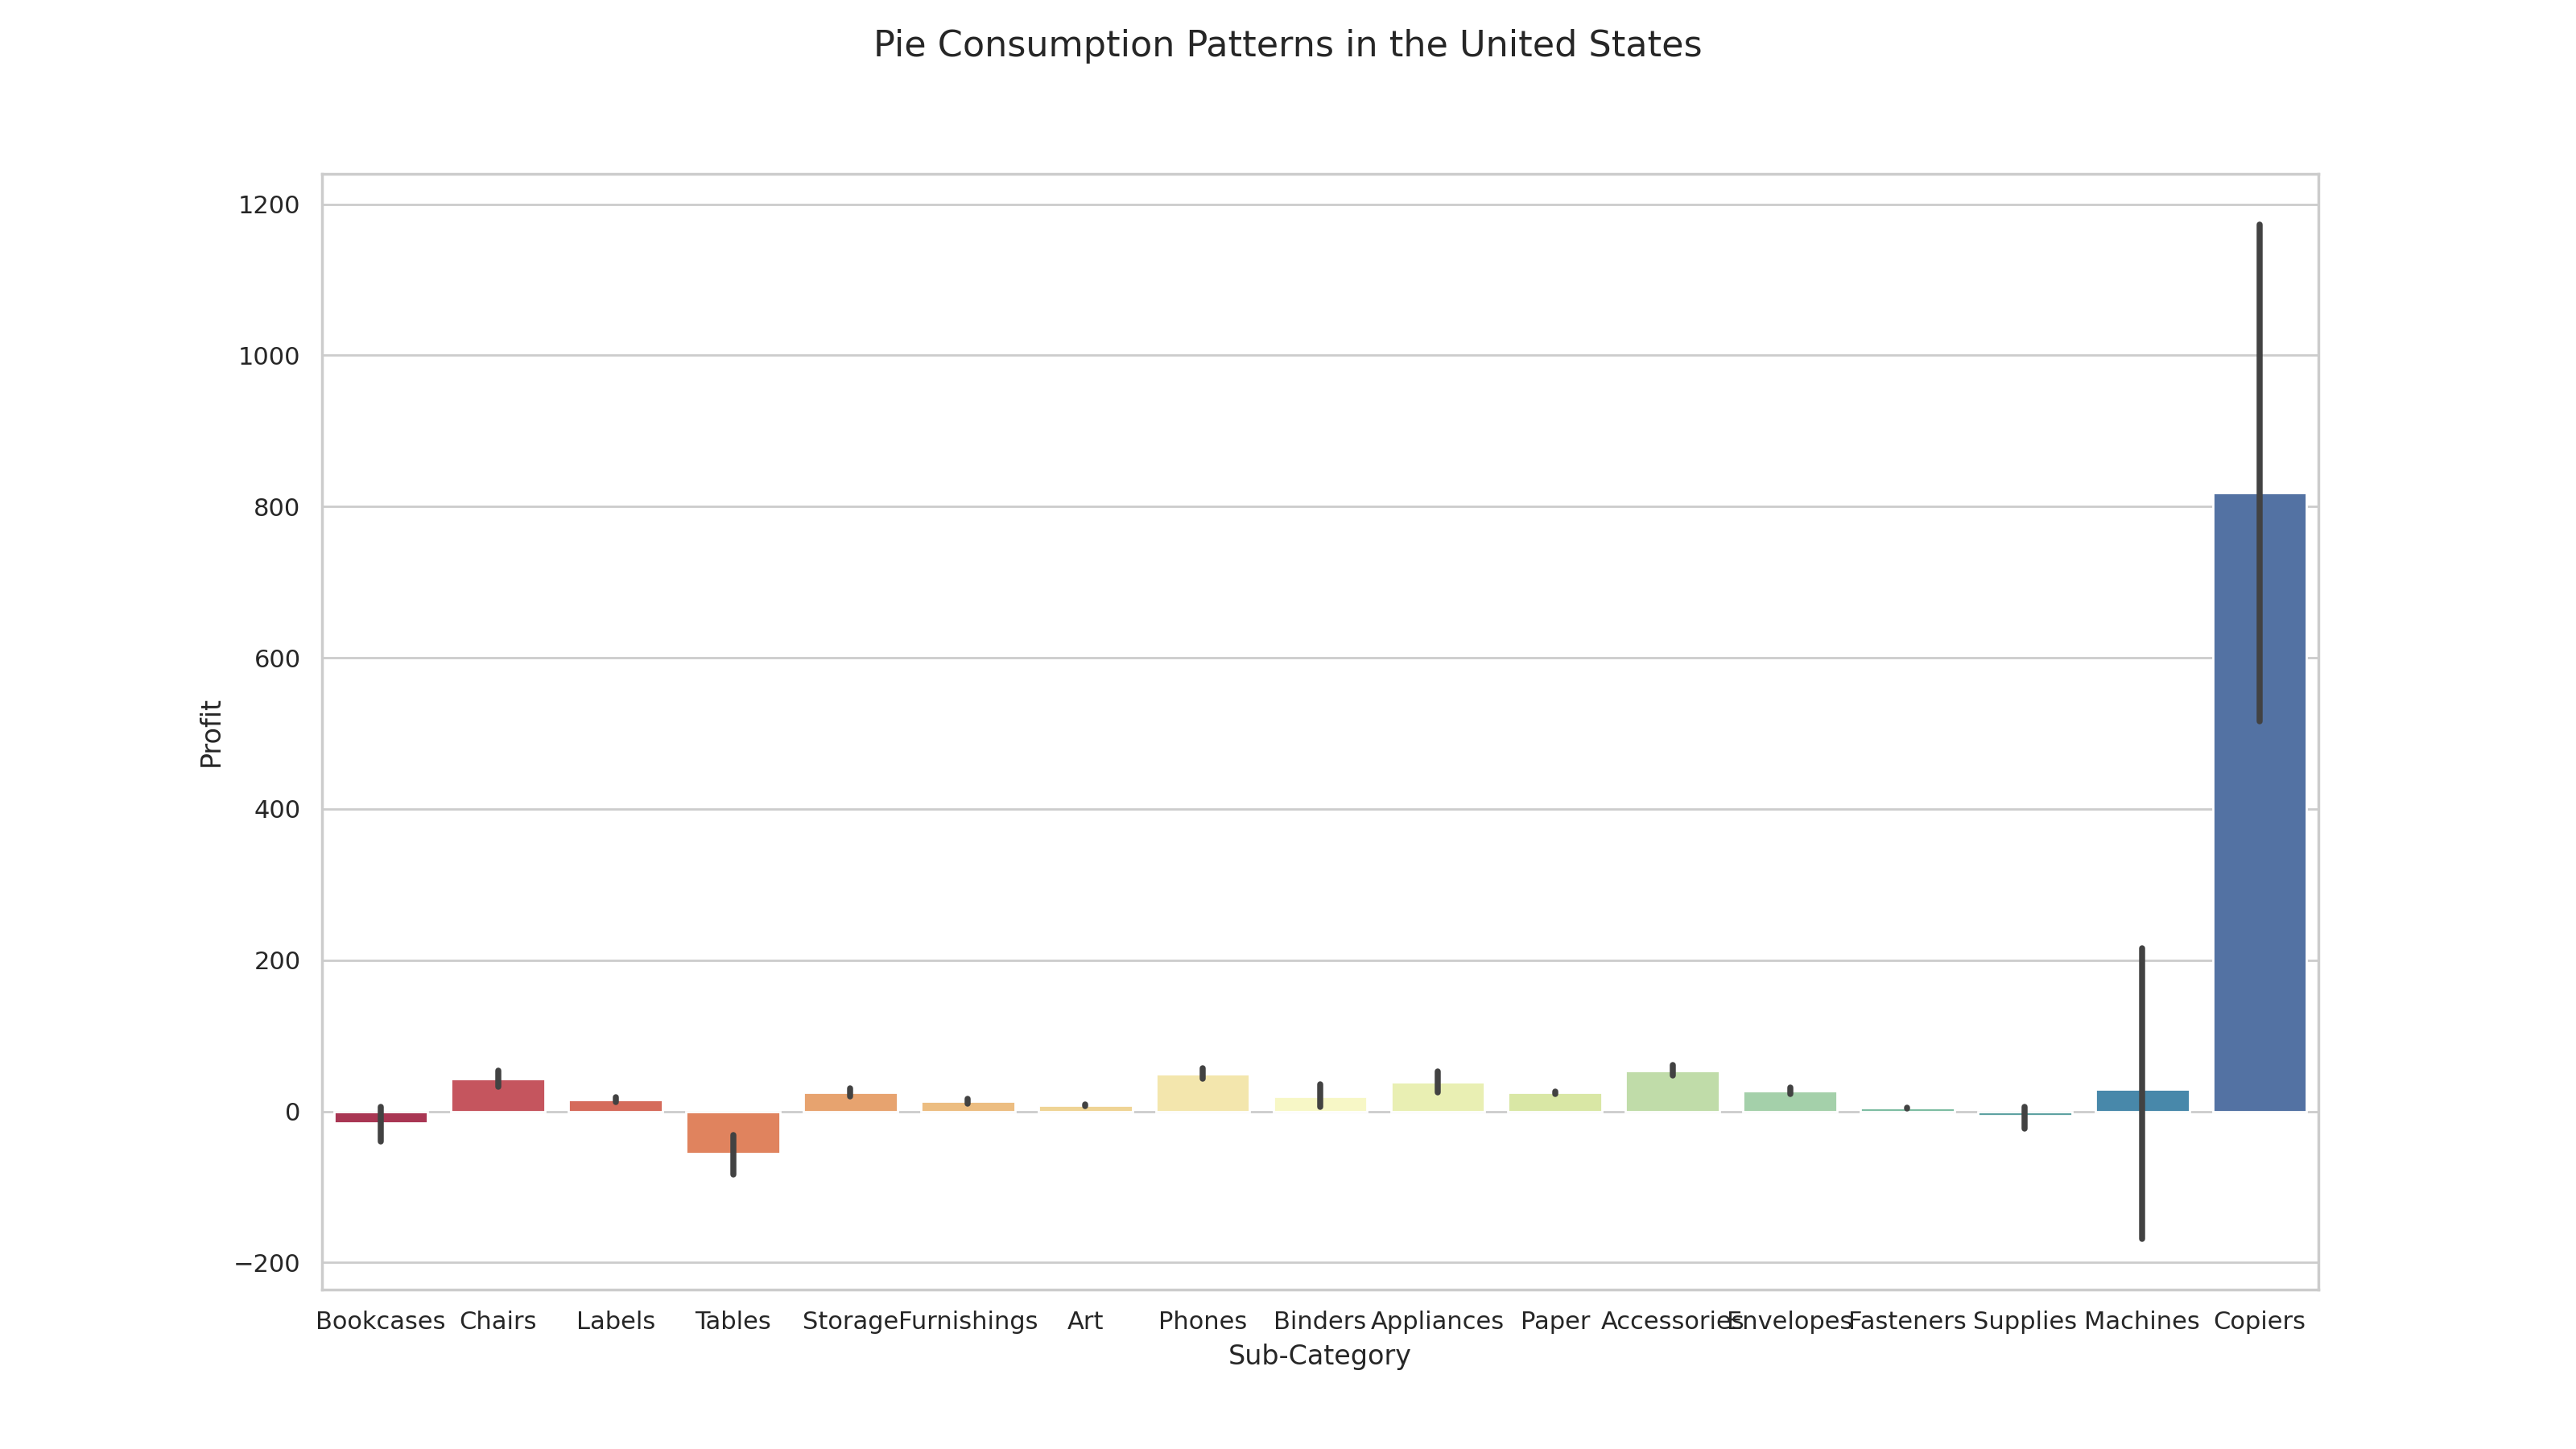

In [21]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(16,9))
sns.barplot(x='Sub-Category',y='Profit', data=data, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

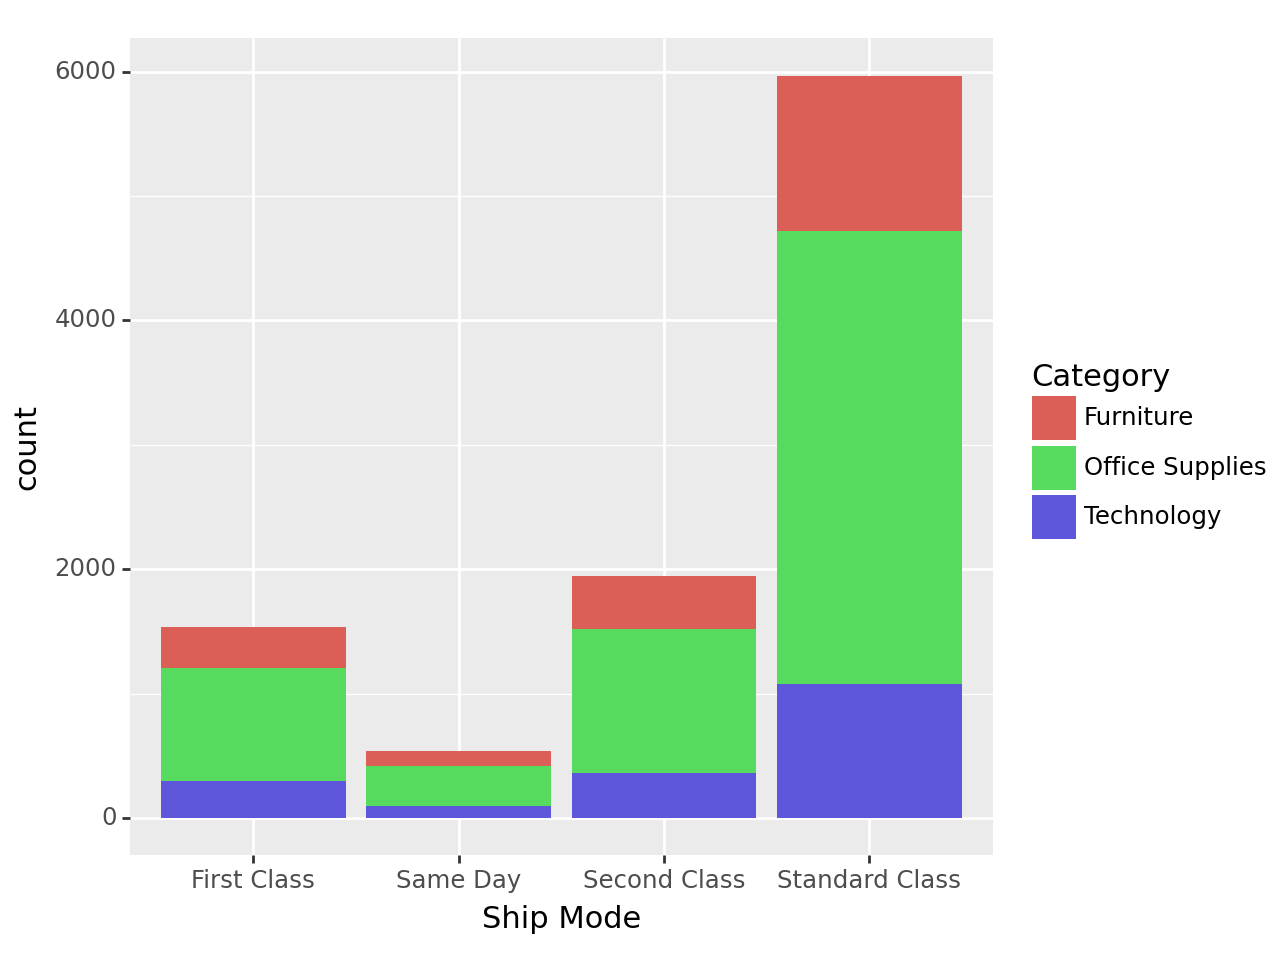

<Figure Size: (640 x 480)>

In [22]:
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

<function matplotlib.pyplot.show(close=None, block=None)>

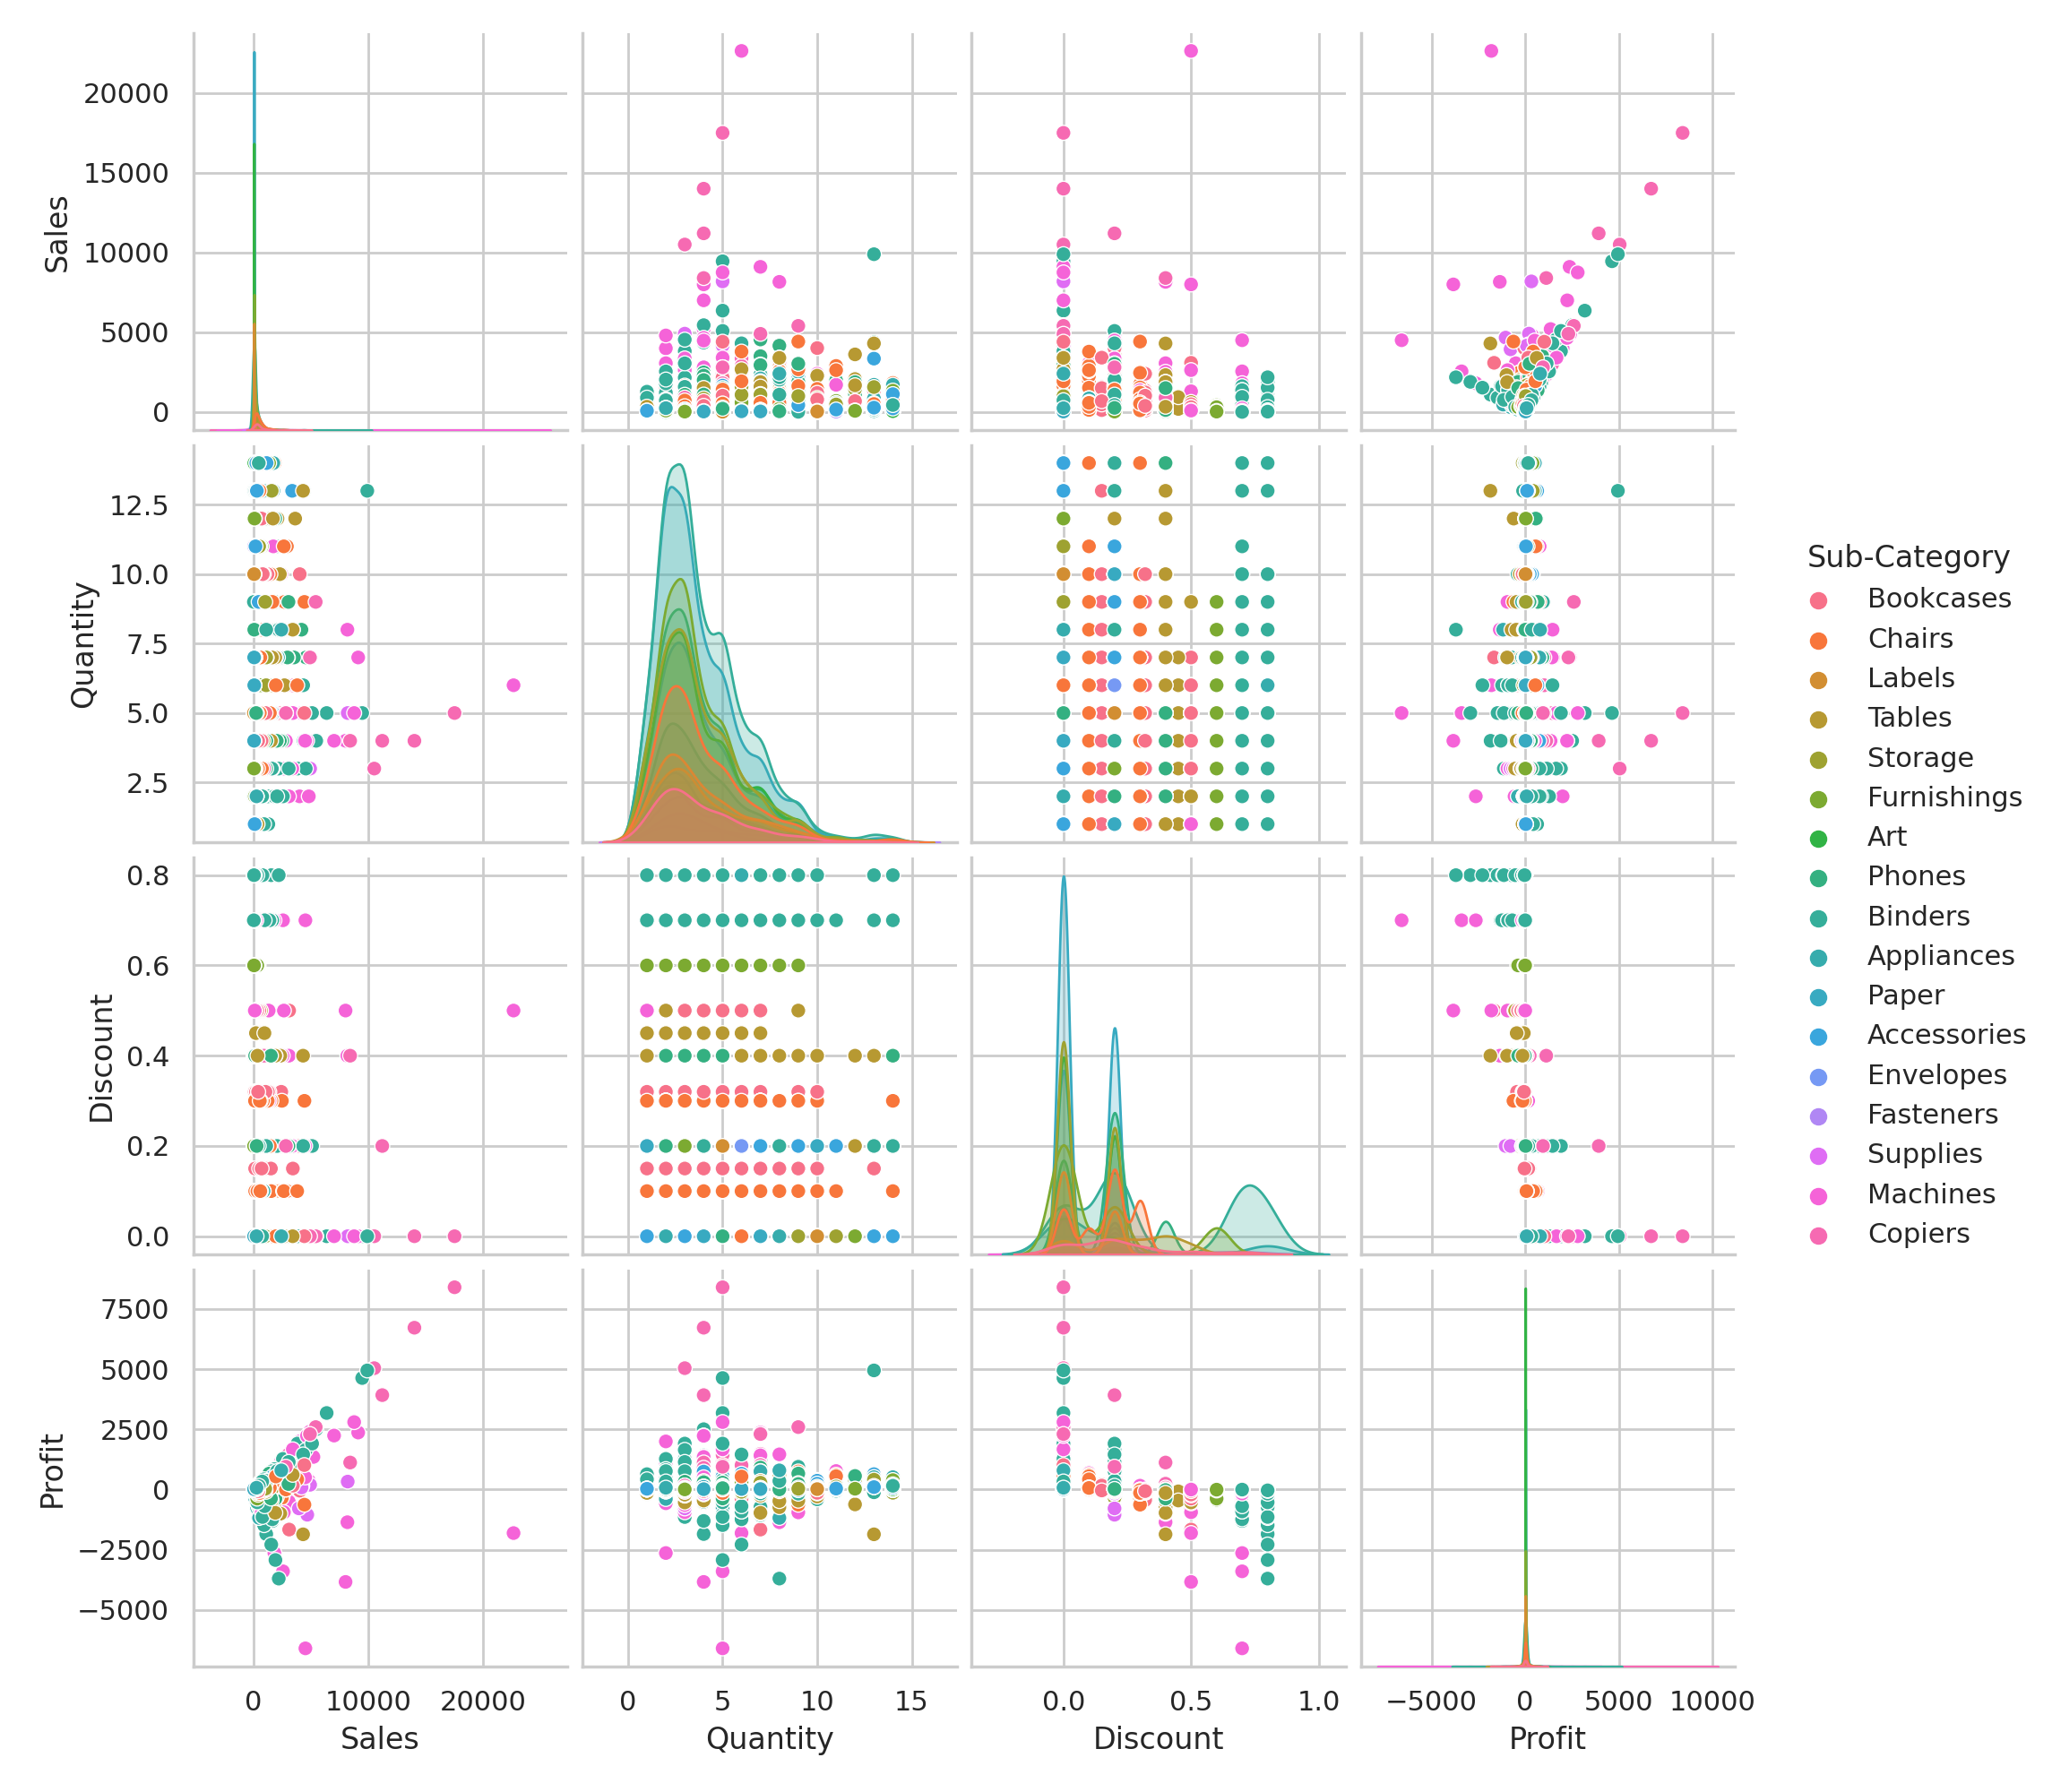

In [23]:
figsize=(16,9)
sns.pairplot(df,hue='Sub-Category')
plt.show

## From the above diagram, we can say that our Data is not normalized and it has a few amount of outliers too.

## Let's explore more about these outliers by using boxplots.

## At first we'll check Sales from Every Segments of Whole Data.

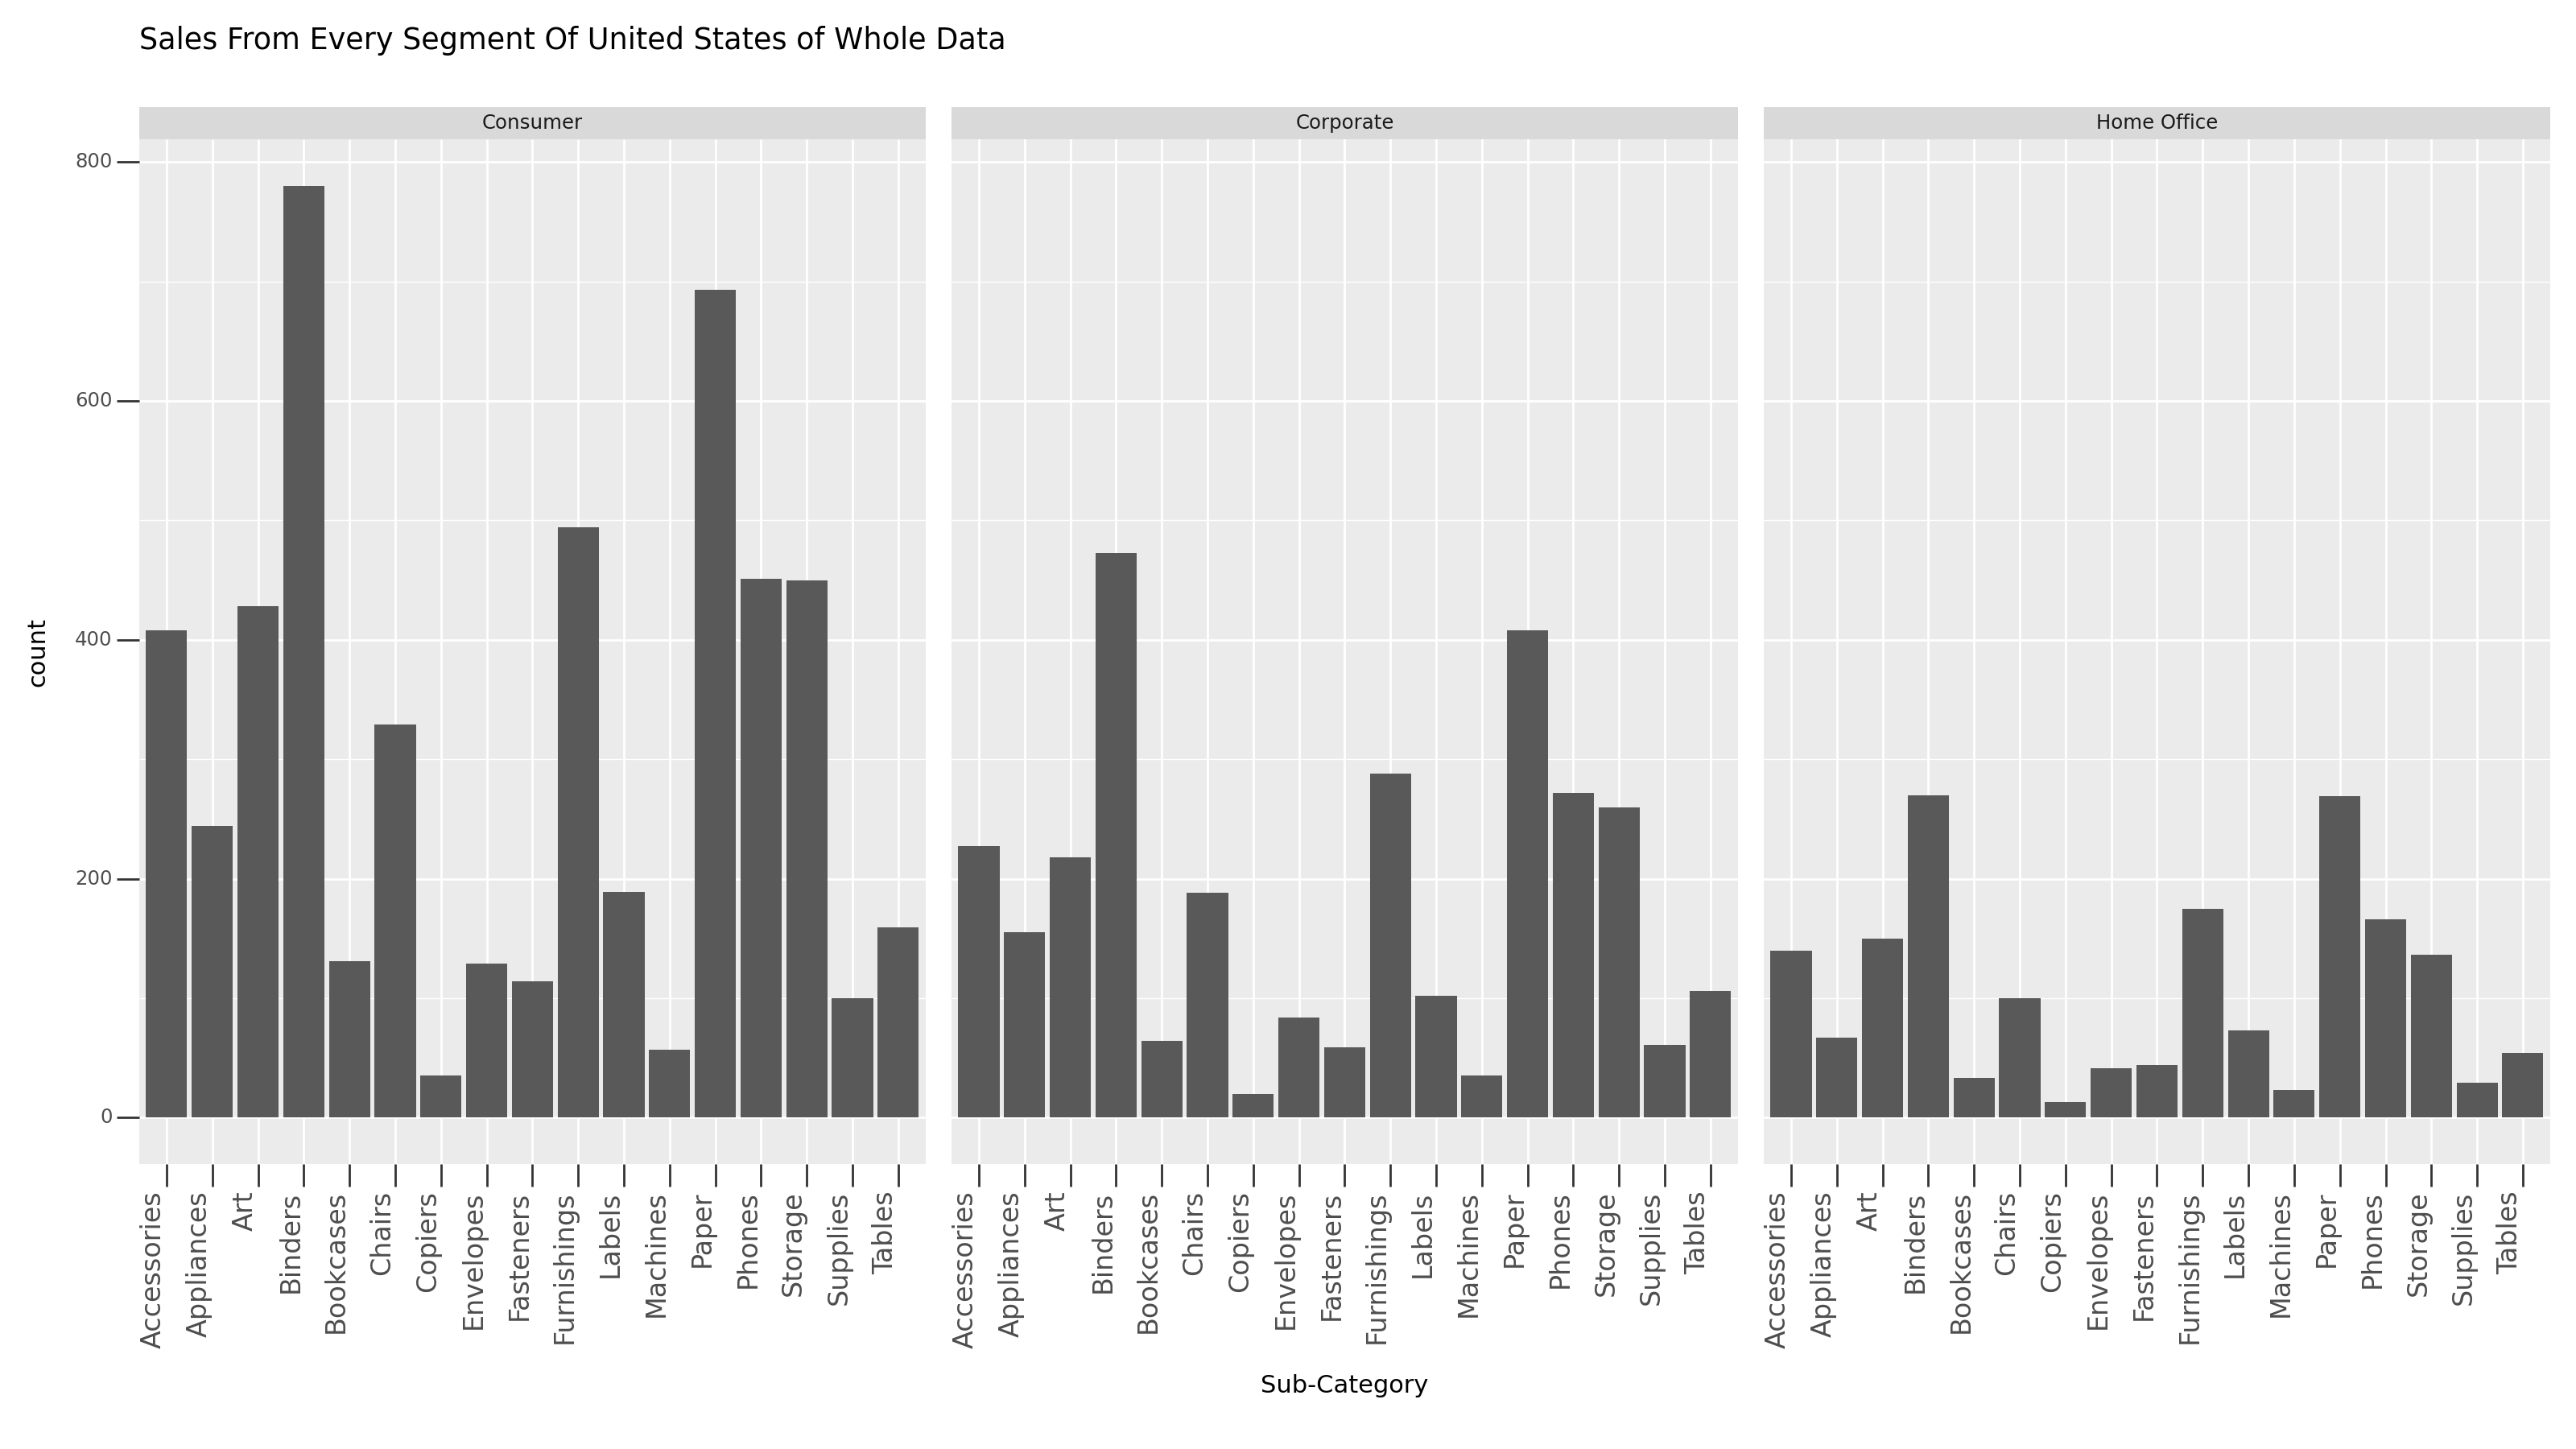

<Figure Size: (1600 x 900)>

In [24]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(16,9),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment'])
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

## From the above graph, we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables", "Supplies", "Machines", "Copiers", "Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.



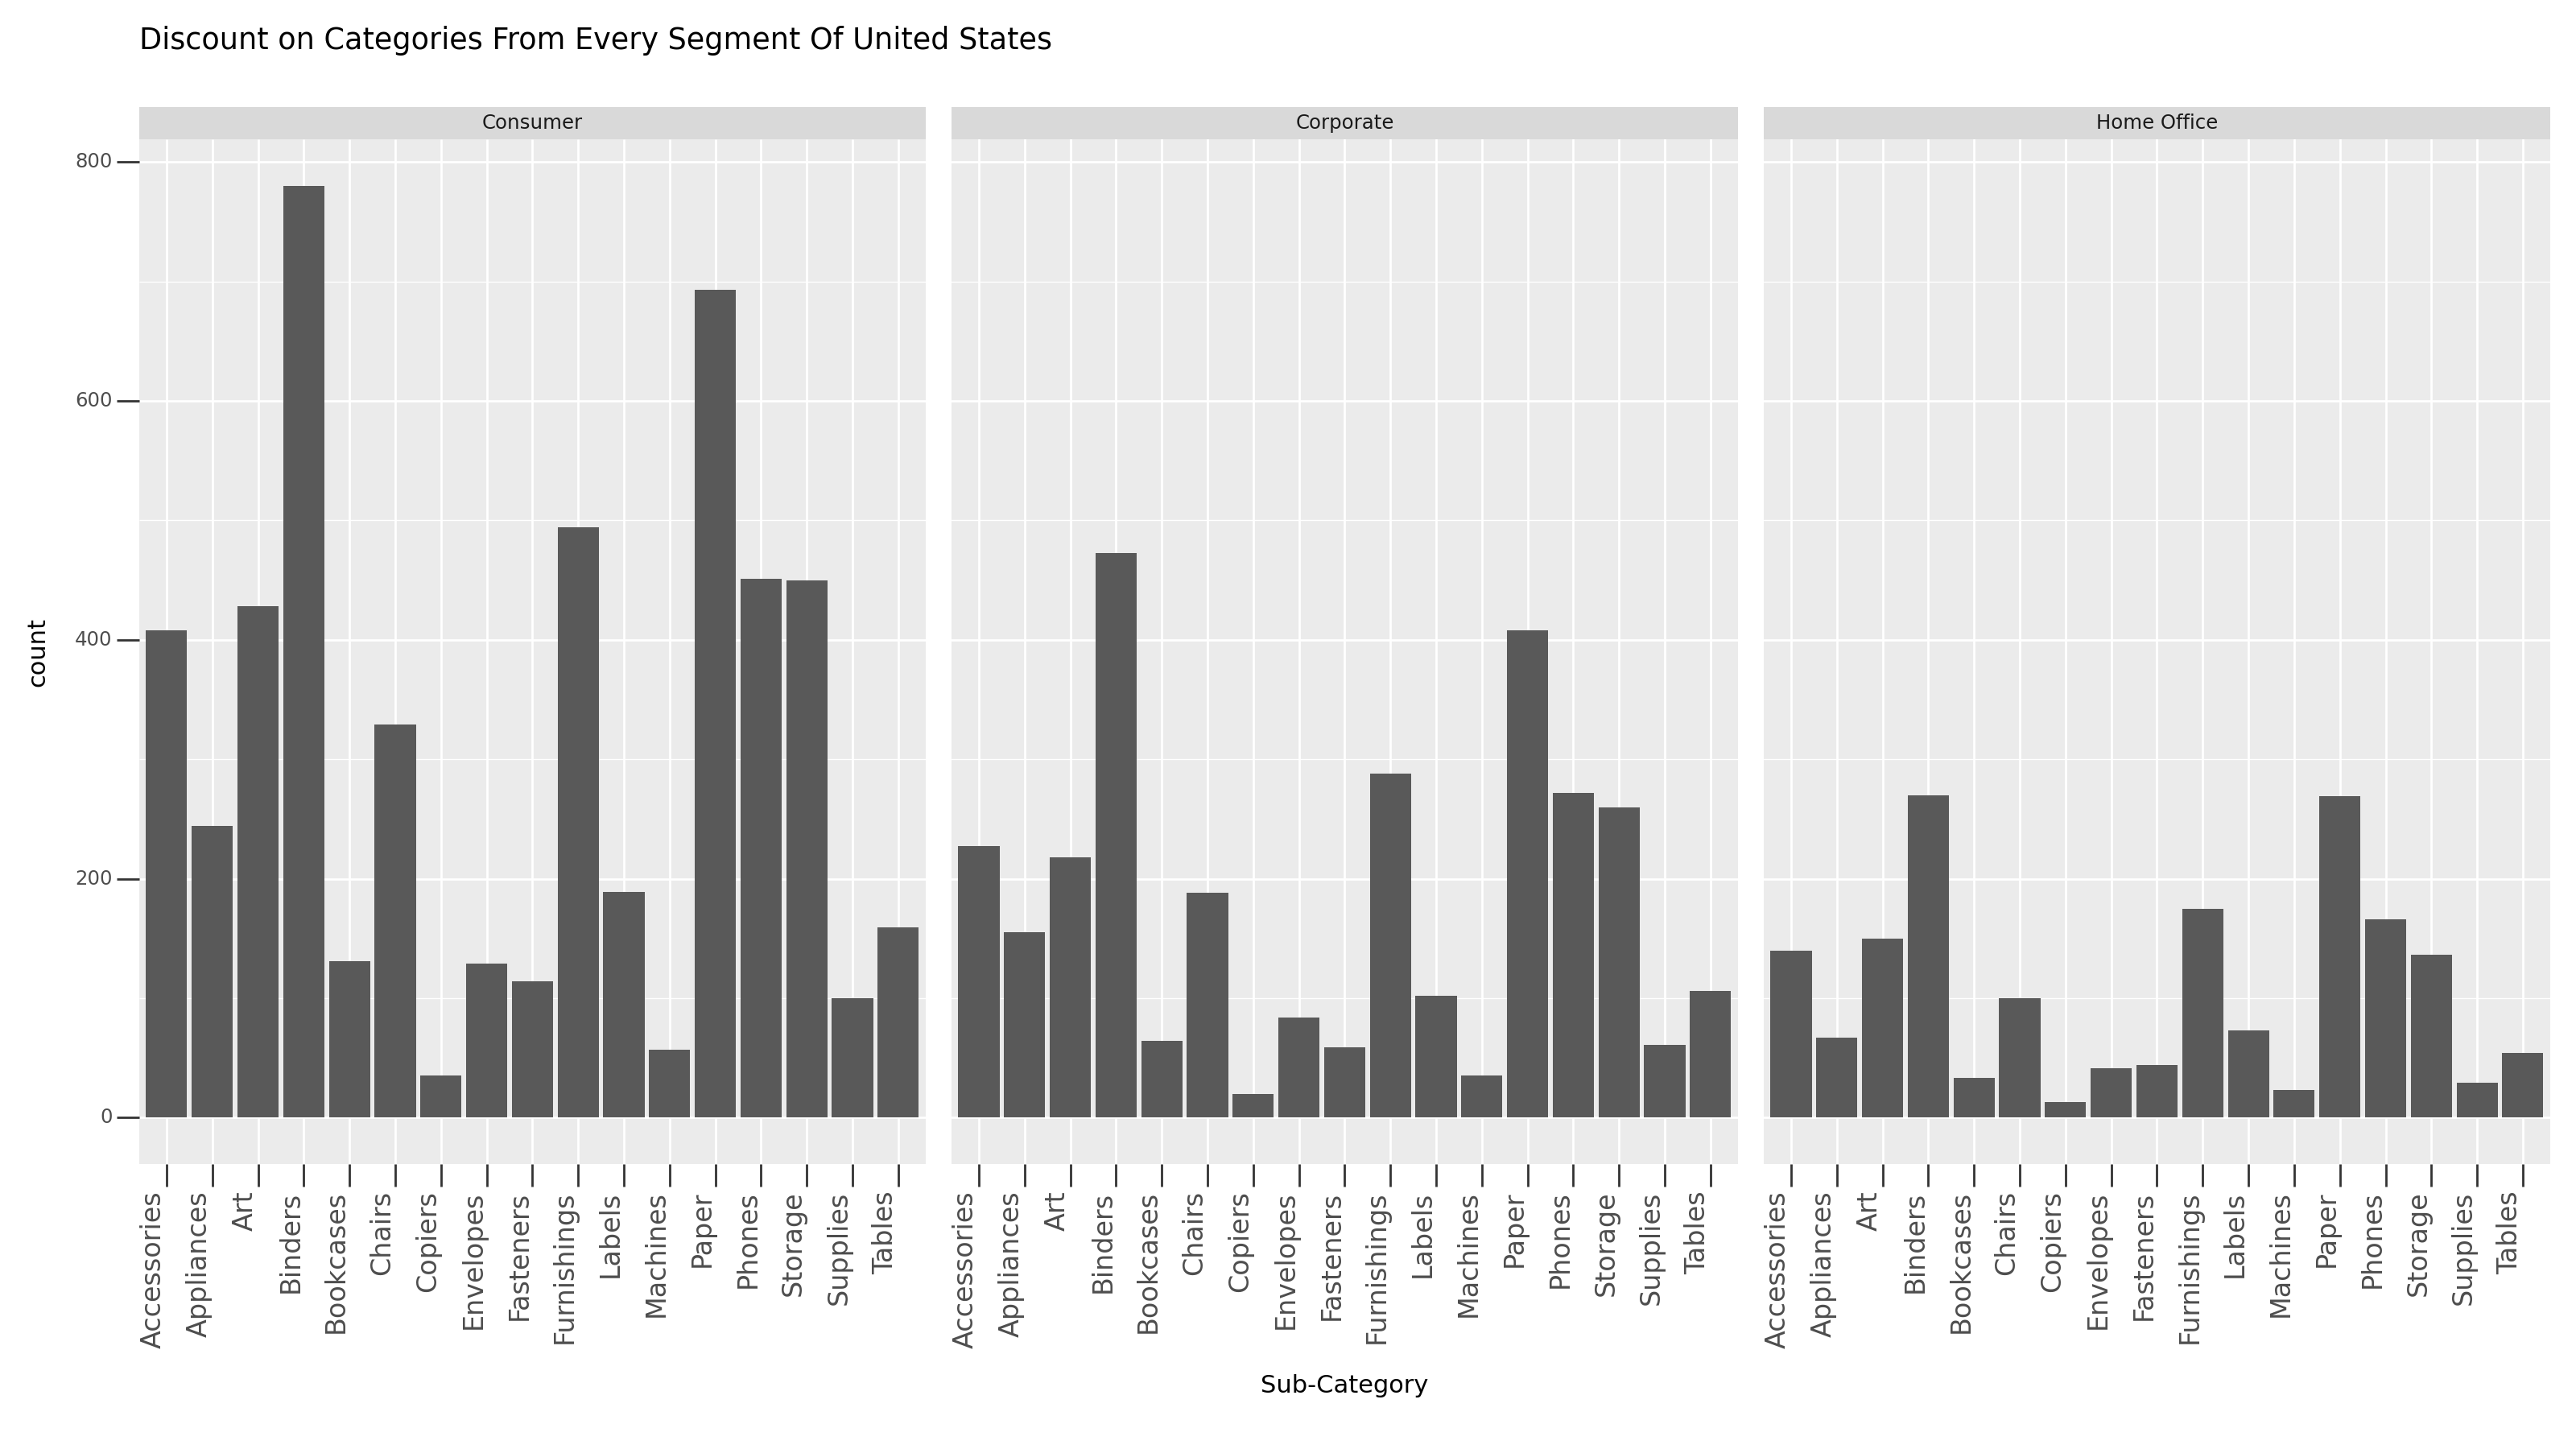

<Figure Size: (1600 x 900)>

In [25]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(16,9),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment'])
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States"))

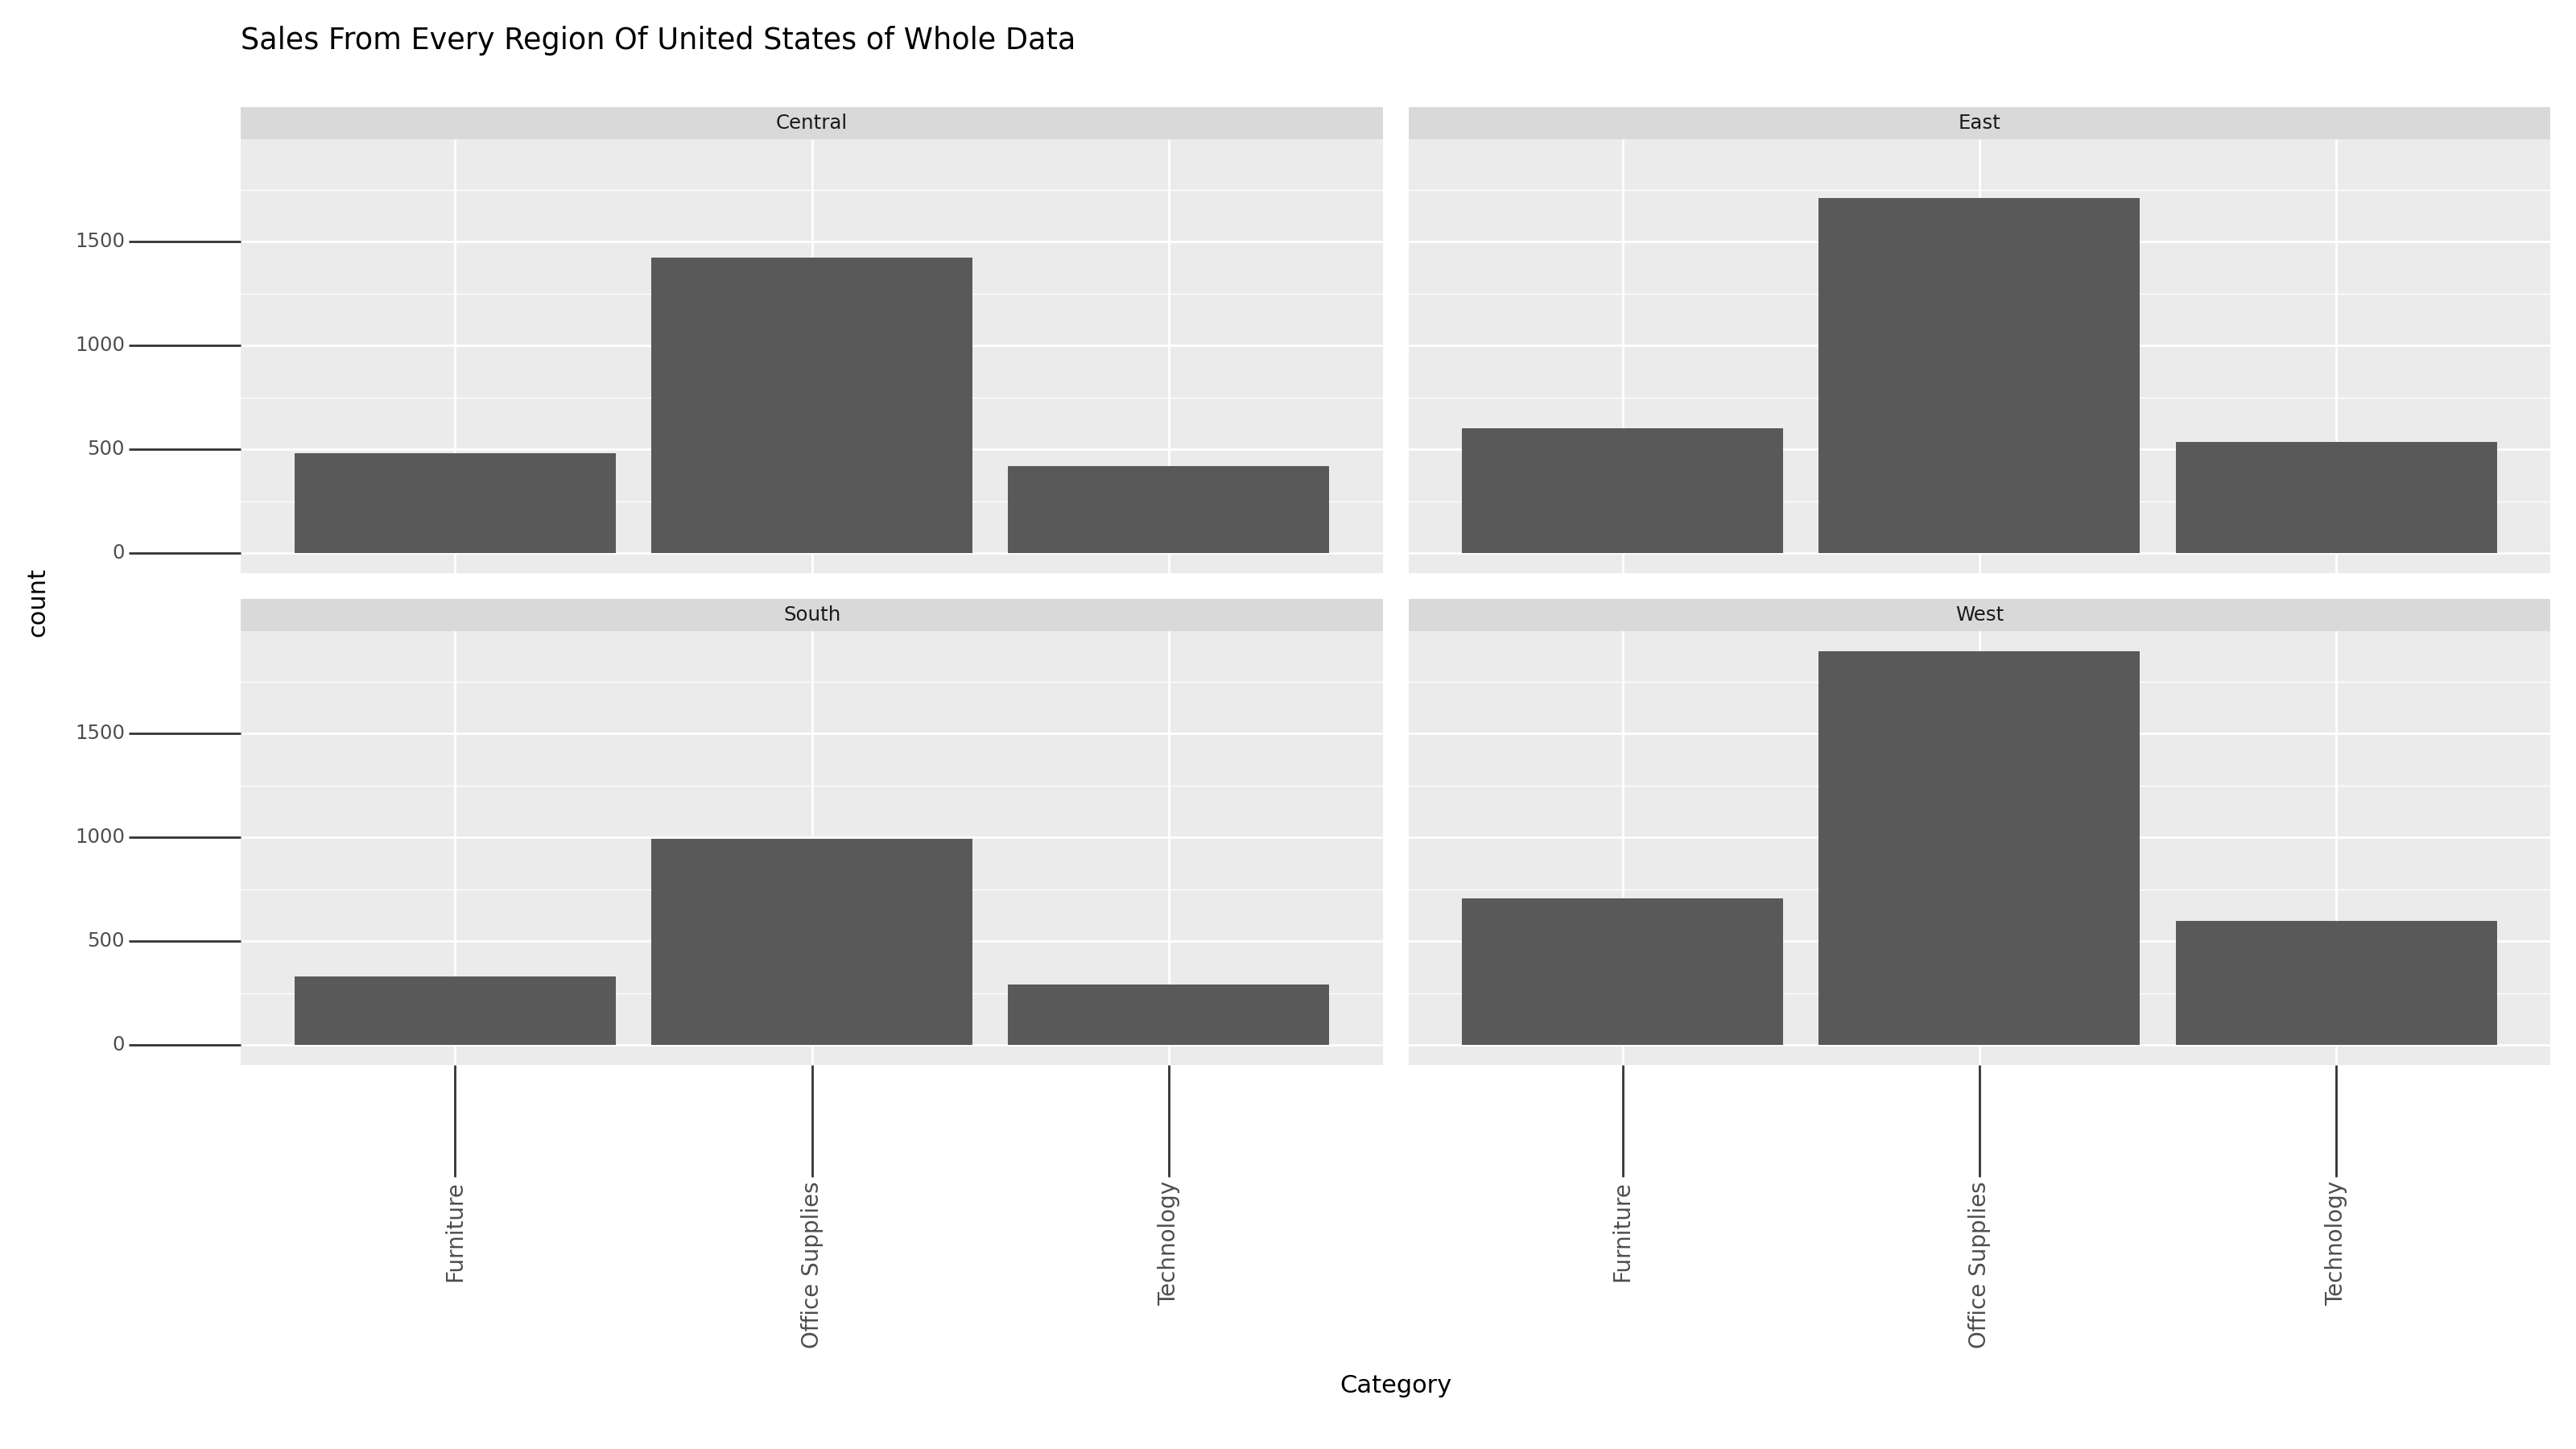

<Figure Size: (1600 x 900)>

In [26]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(16,9),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10))
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

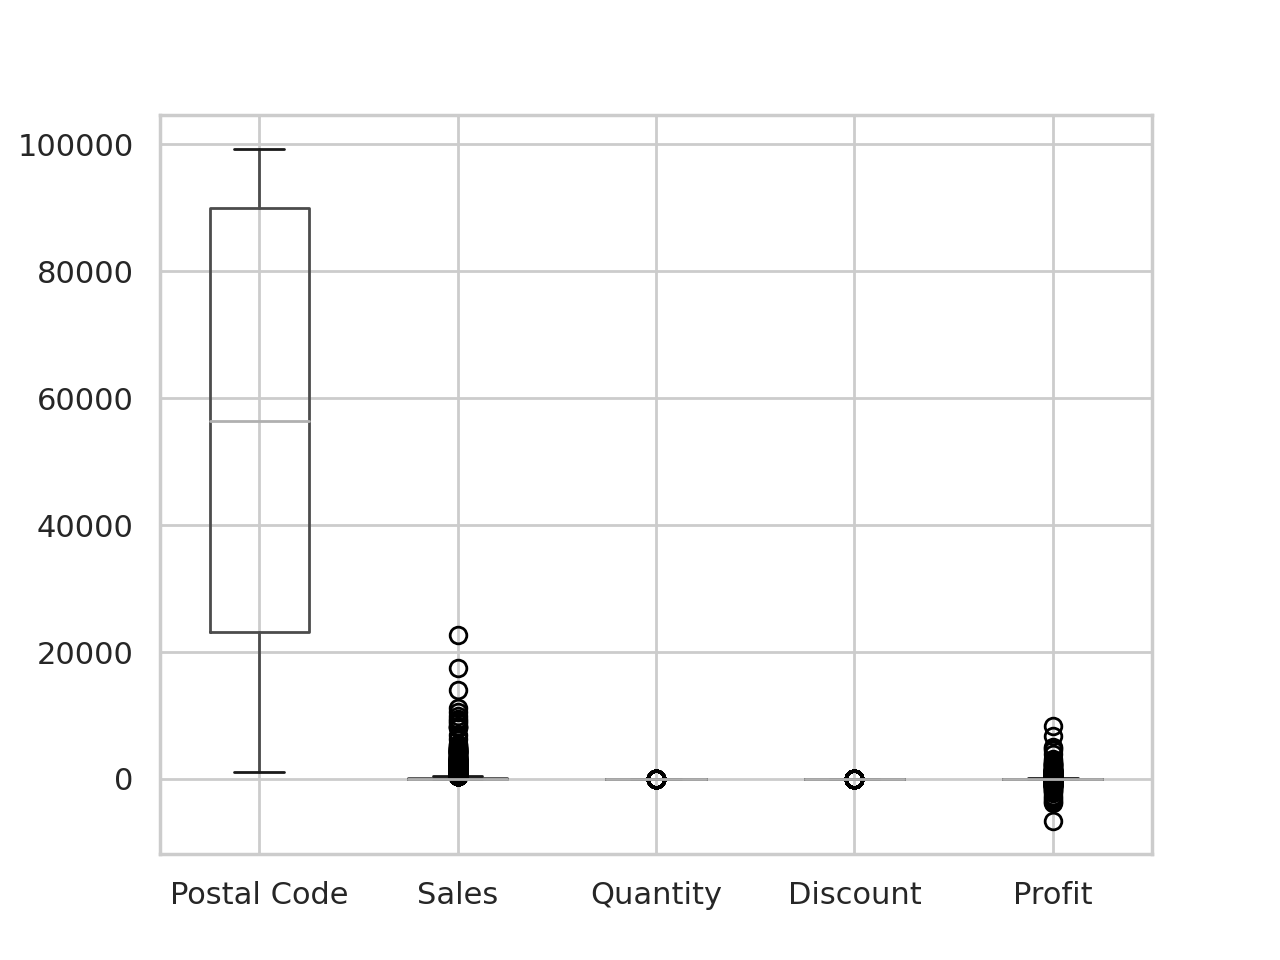

In [27]:
# Create a boxplot
data.boxplot()
plt.show()

In [28]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [29]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,
    z = state_data.Sales,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

## Next, we'll delve into the sales data of randomly selected states from each profit category, including high profit, medium profit, low profit, low loss, and high loss. Our objective is to identify significant patterns and trends that could provide insights for boosting overall sales.

In [30]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (16,9))
        fig.suptitle(state, fontsize=14)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

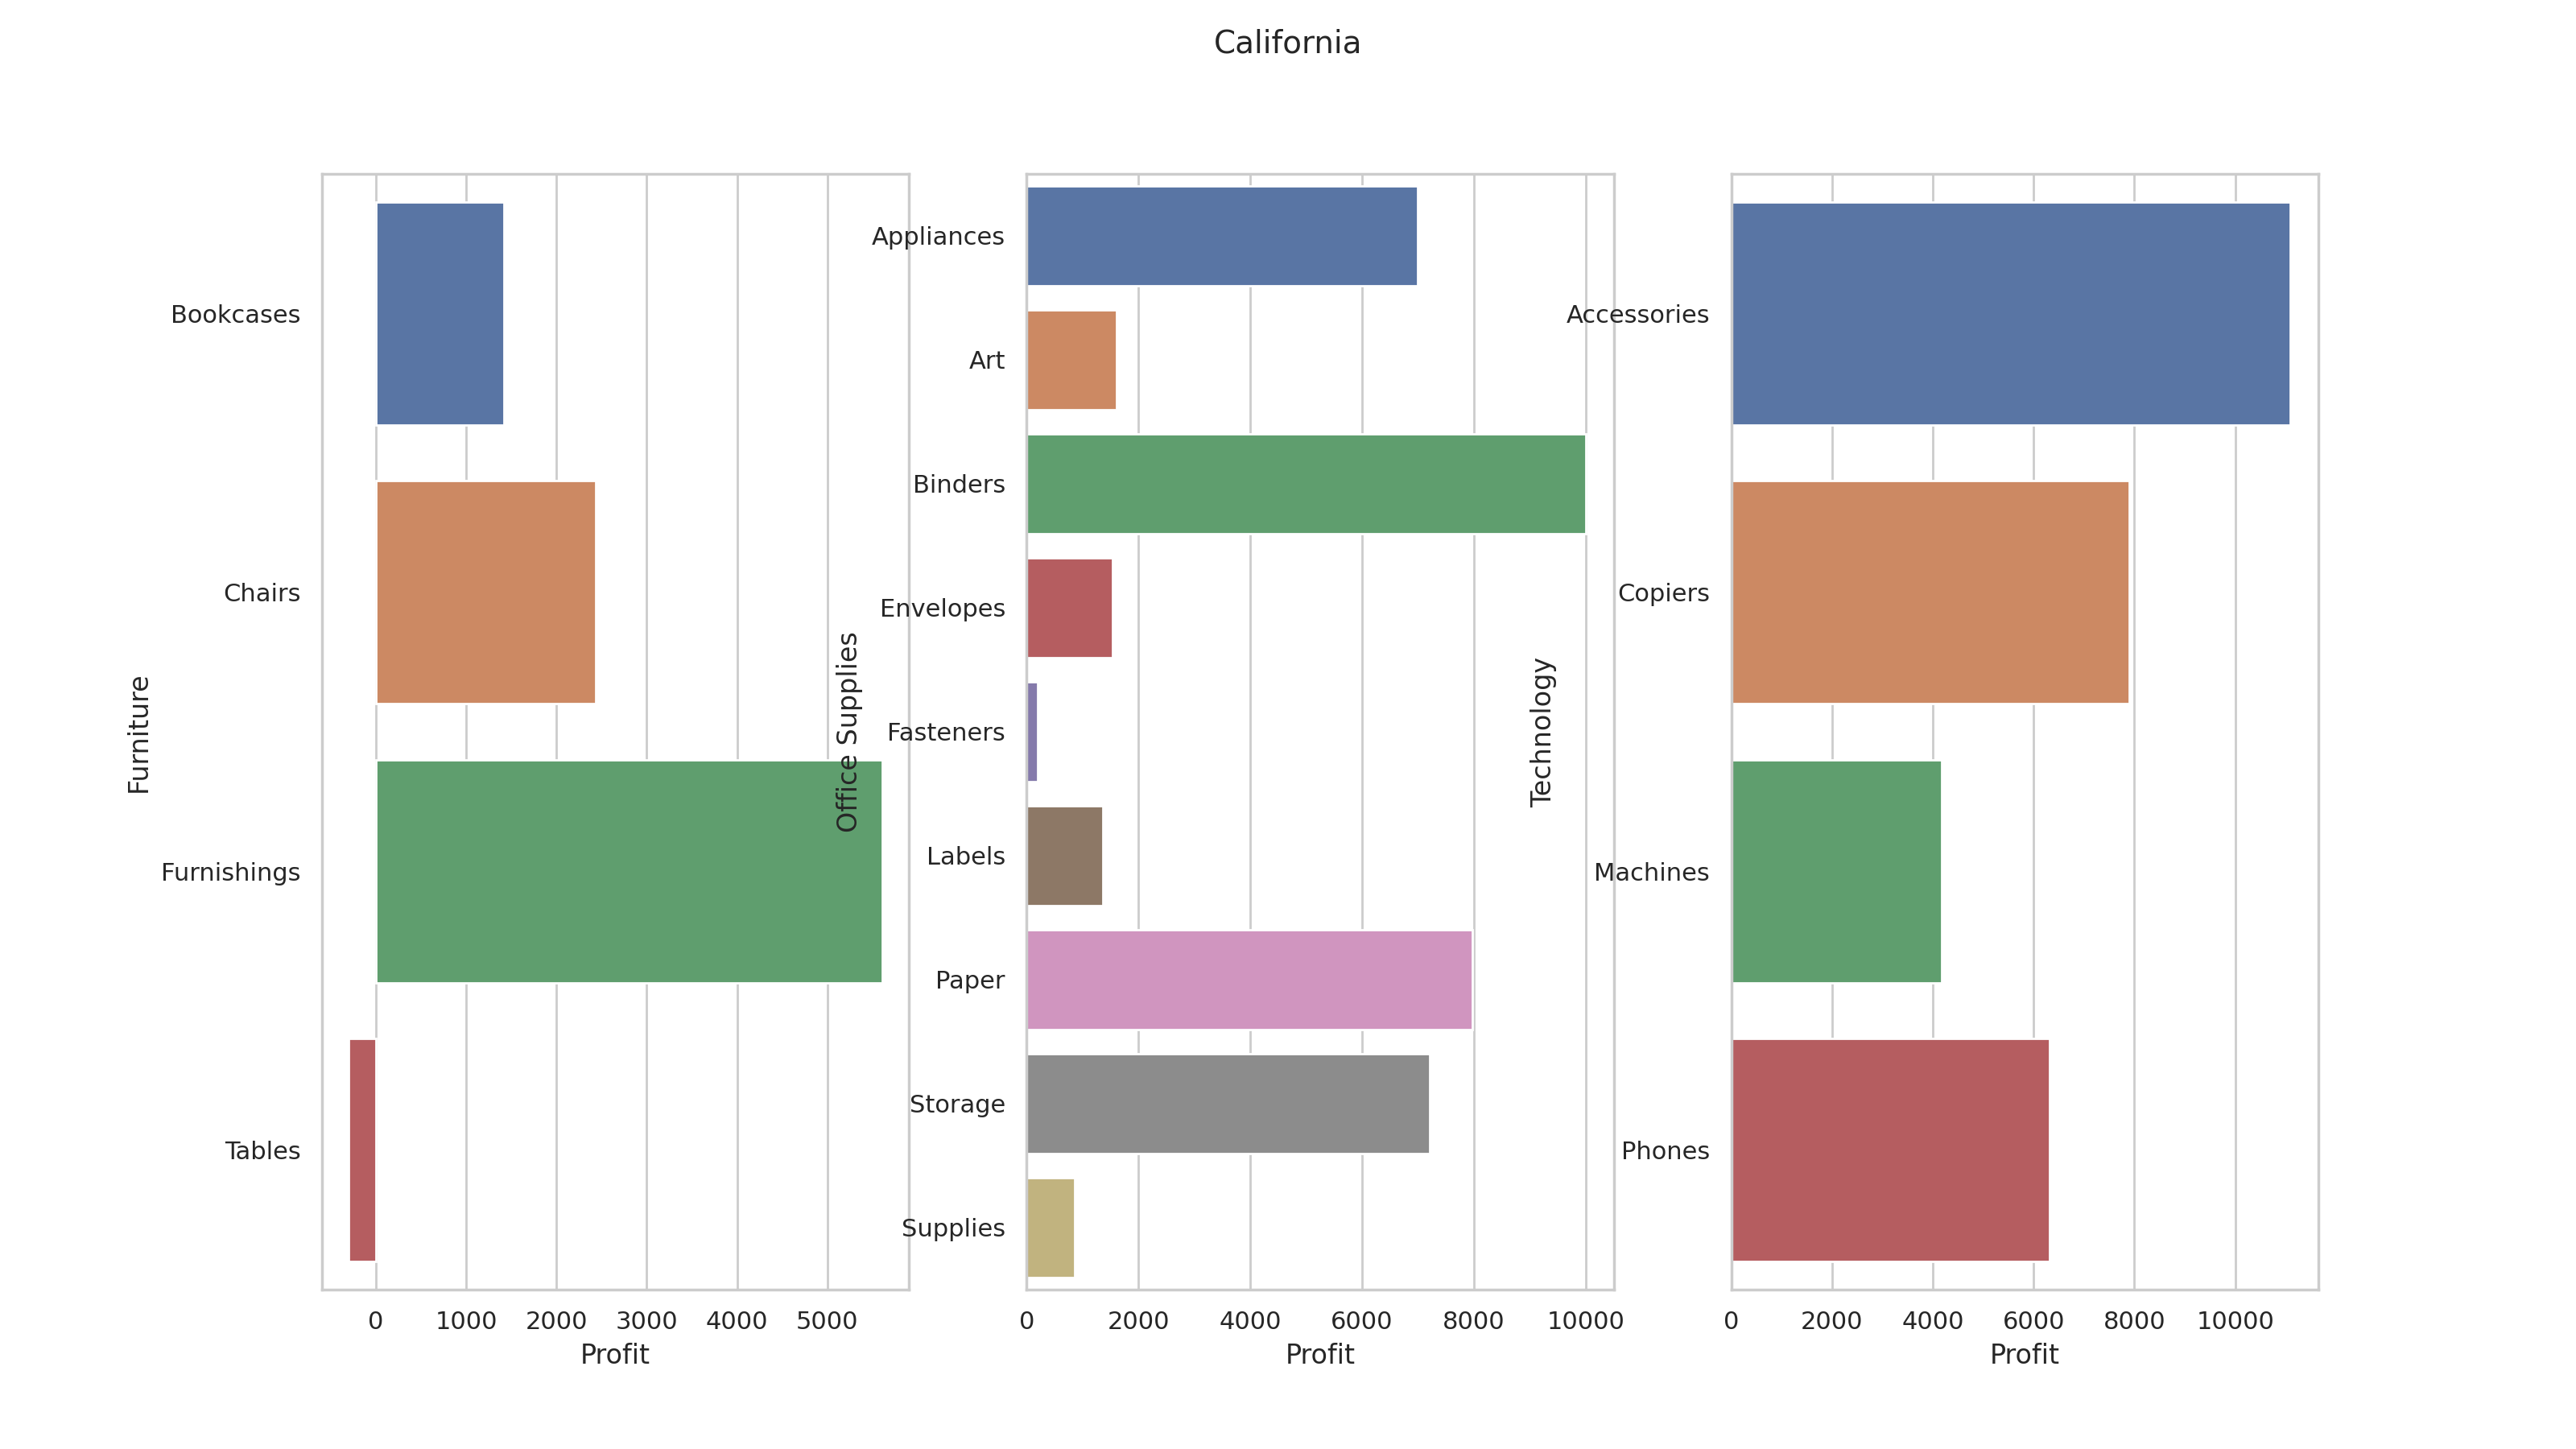

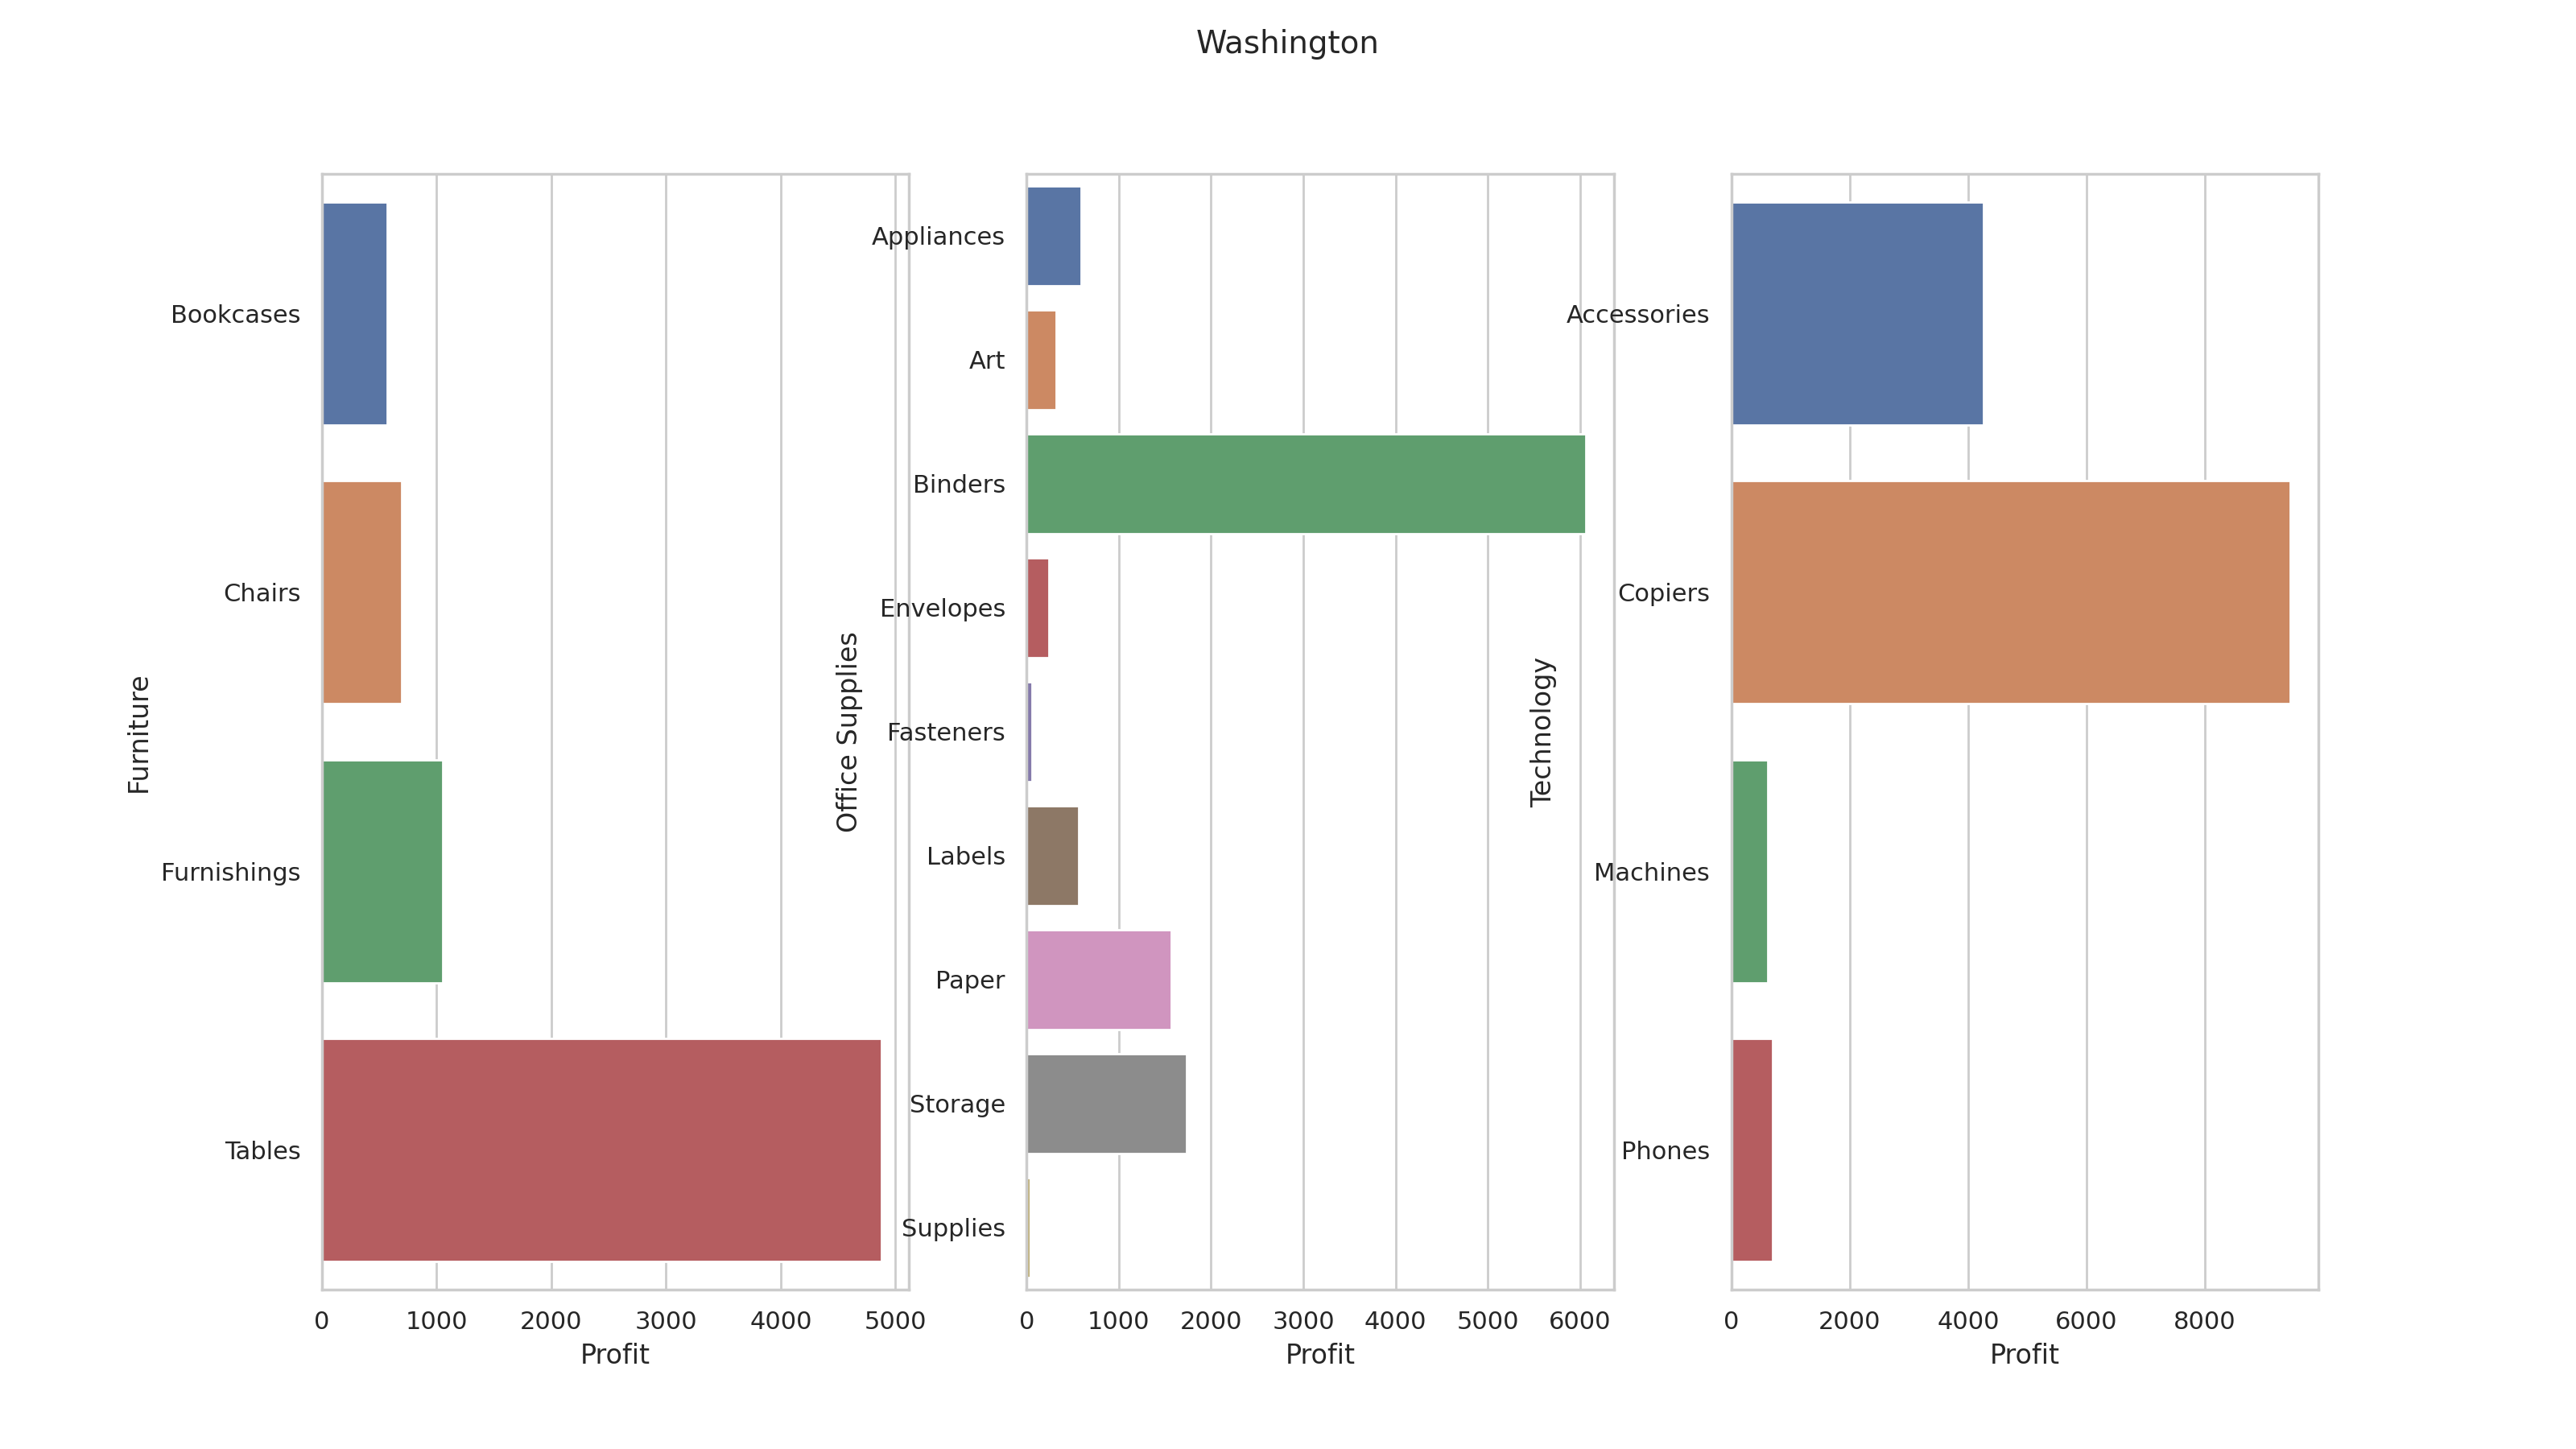

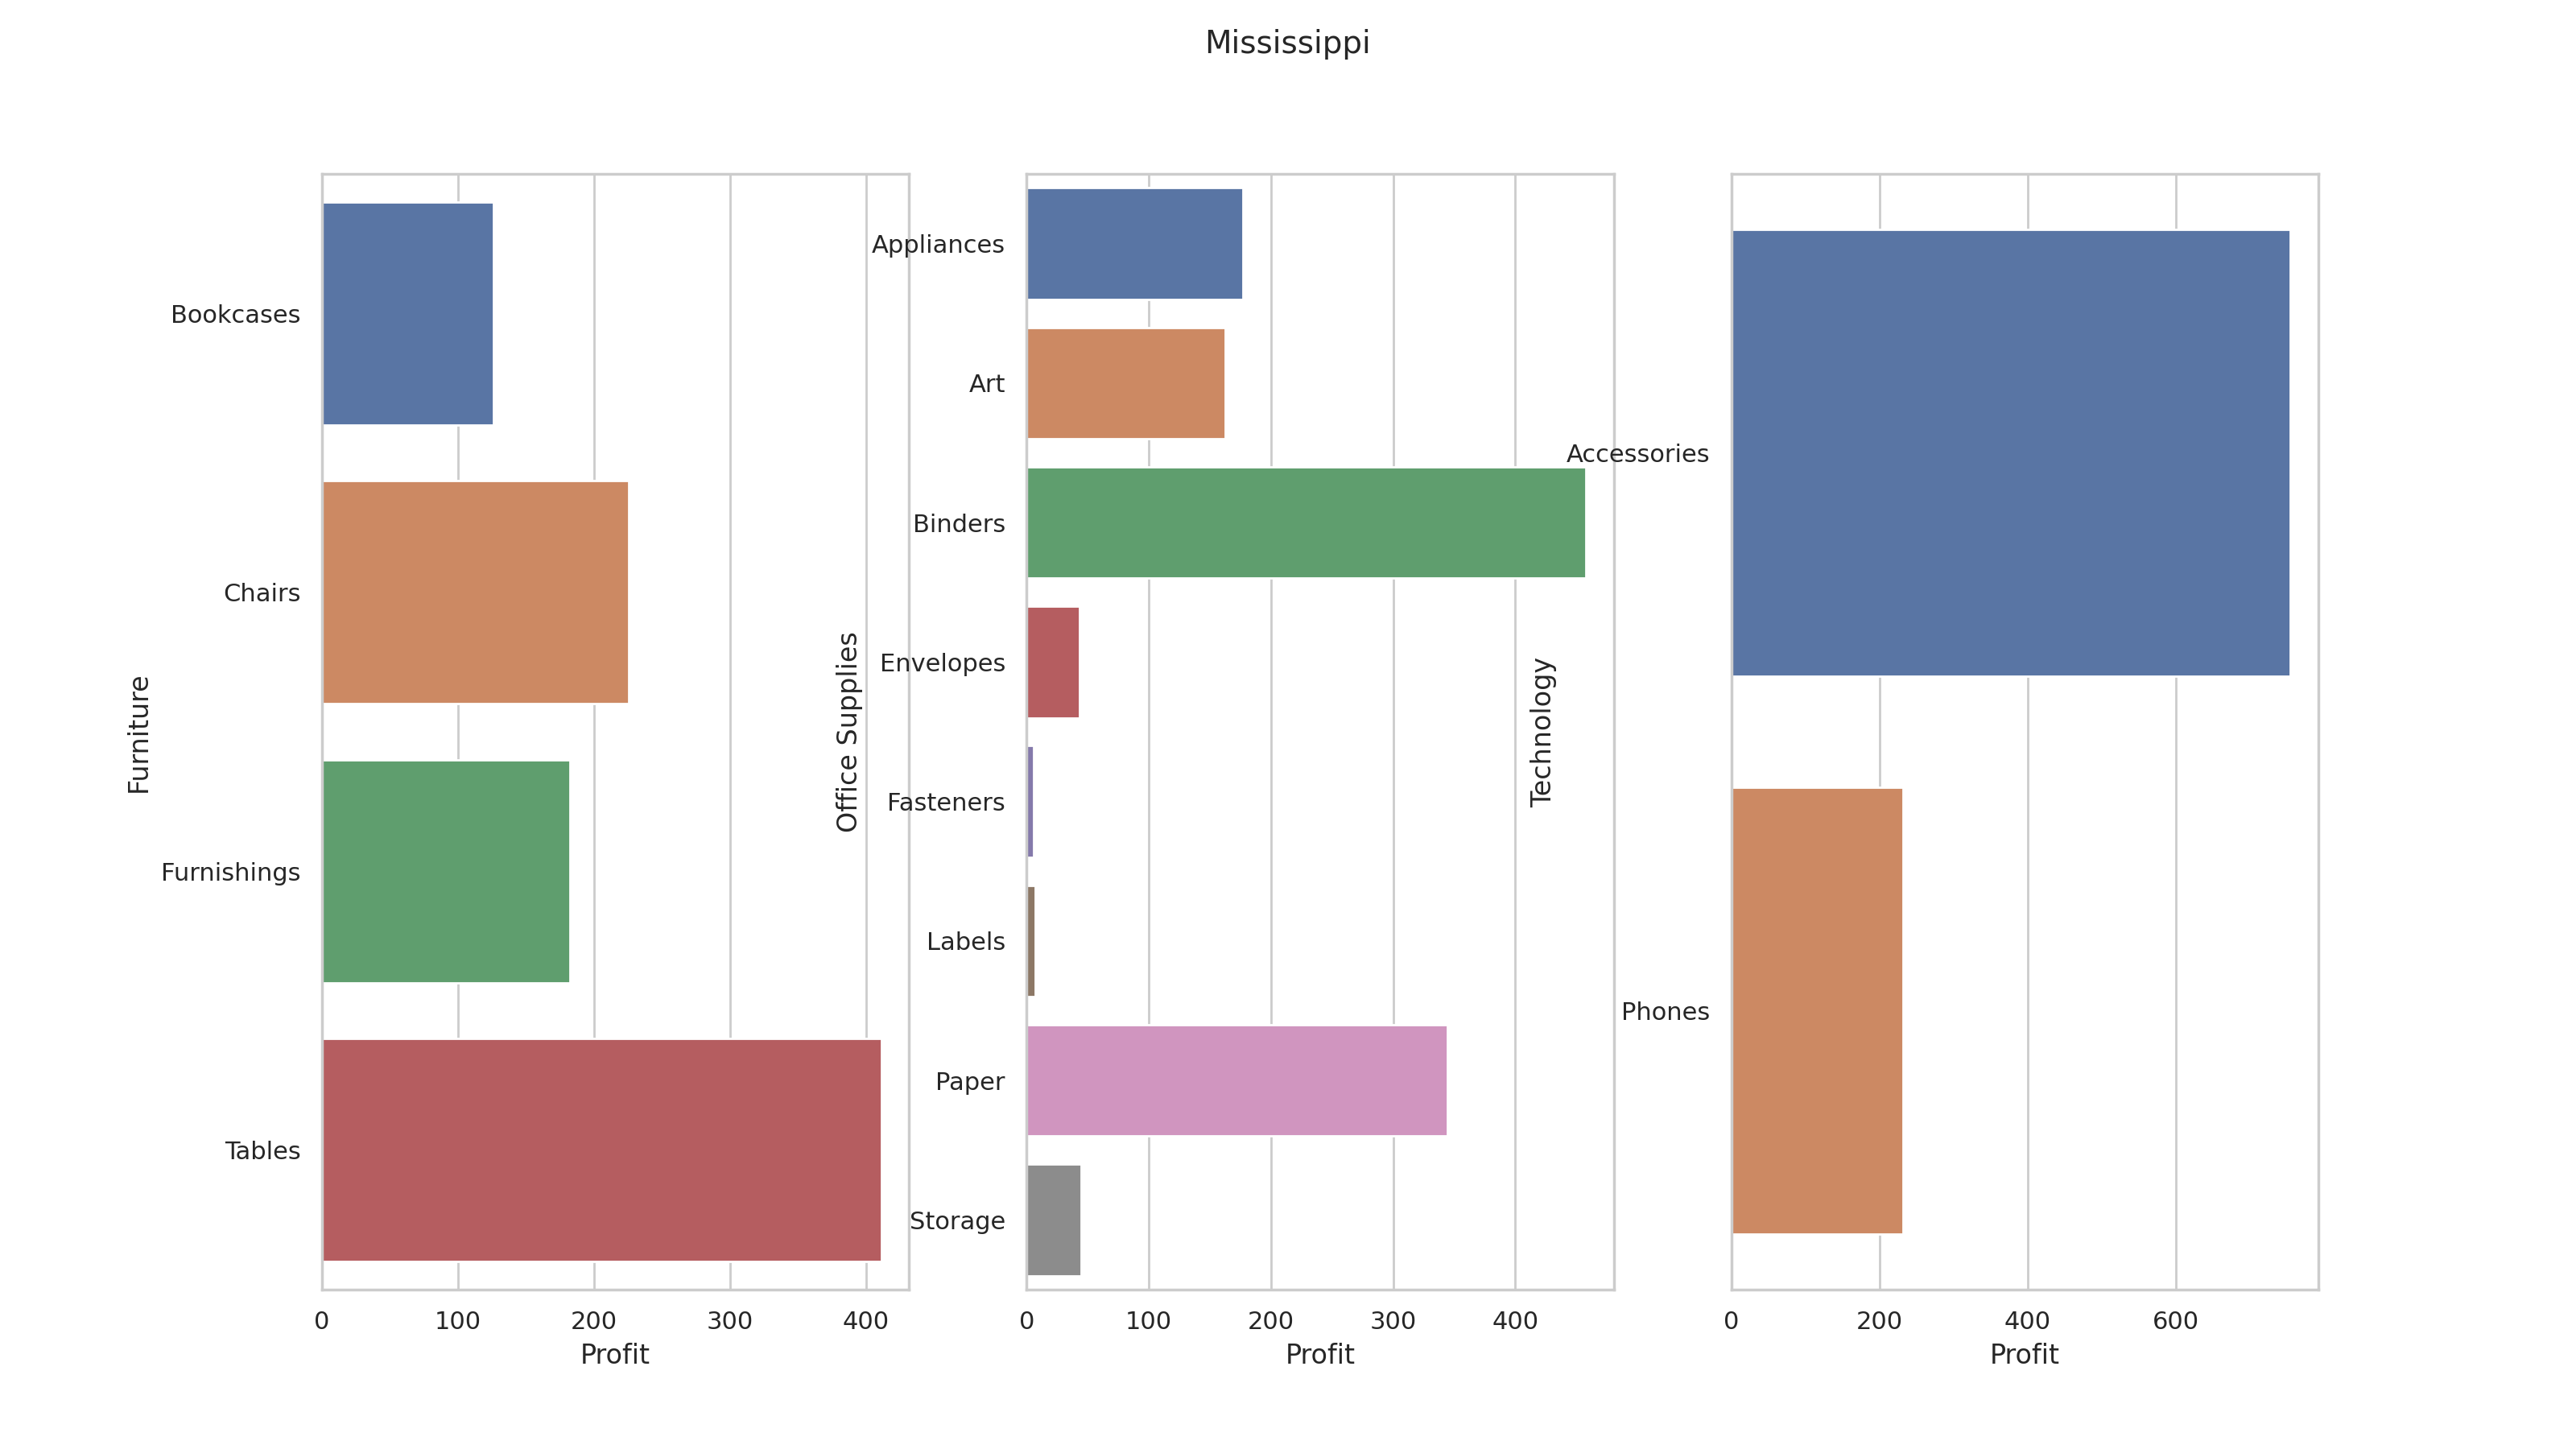

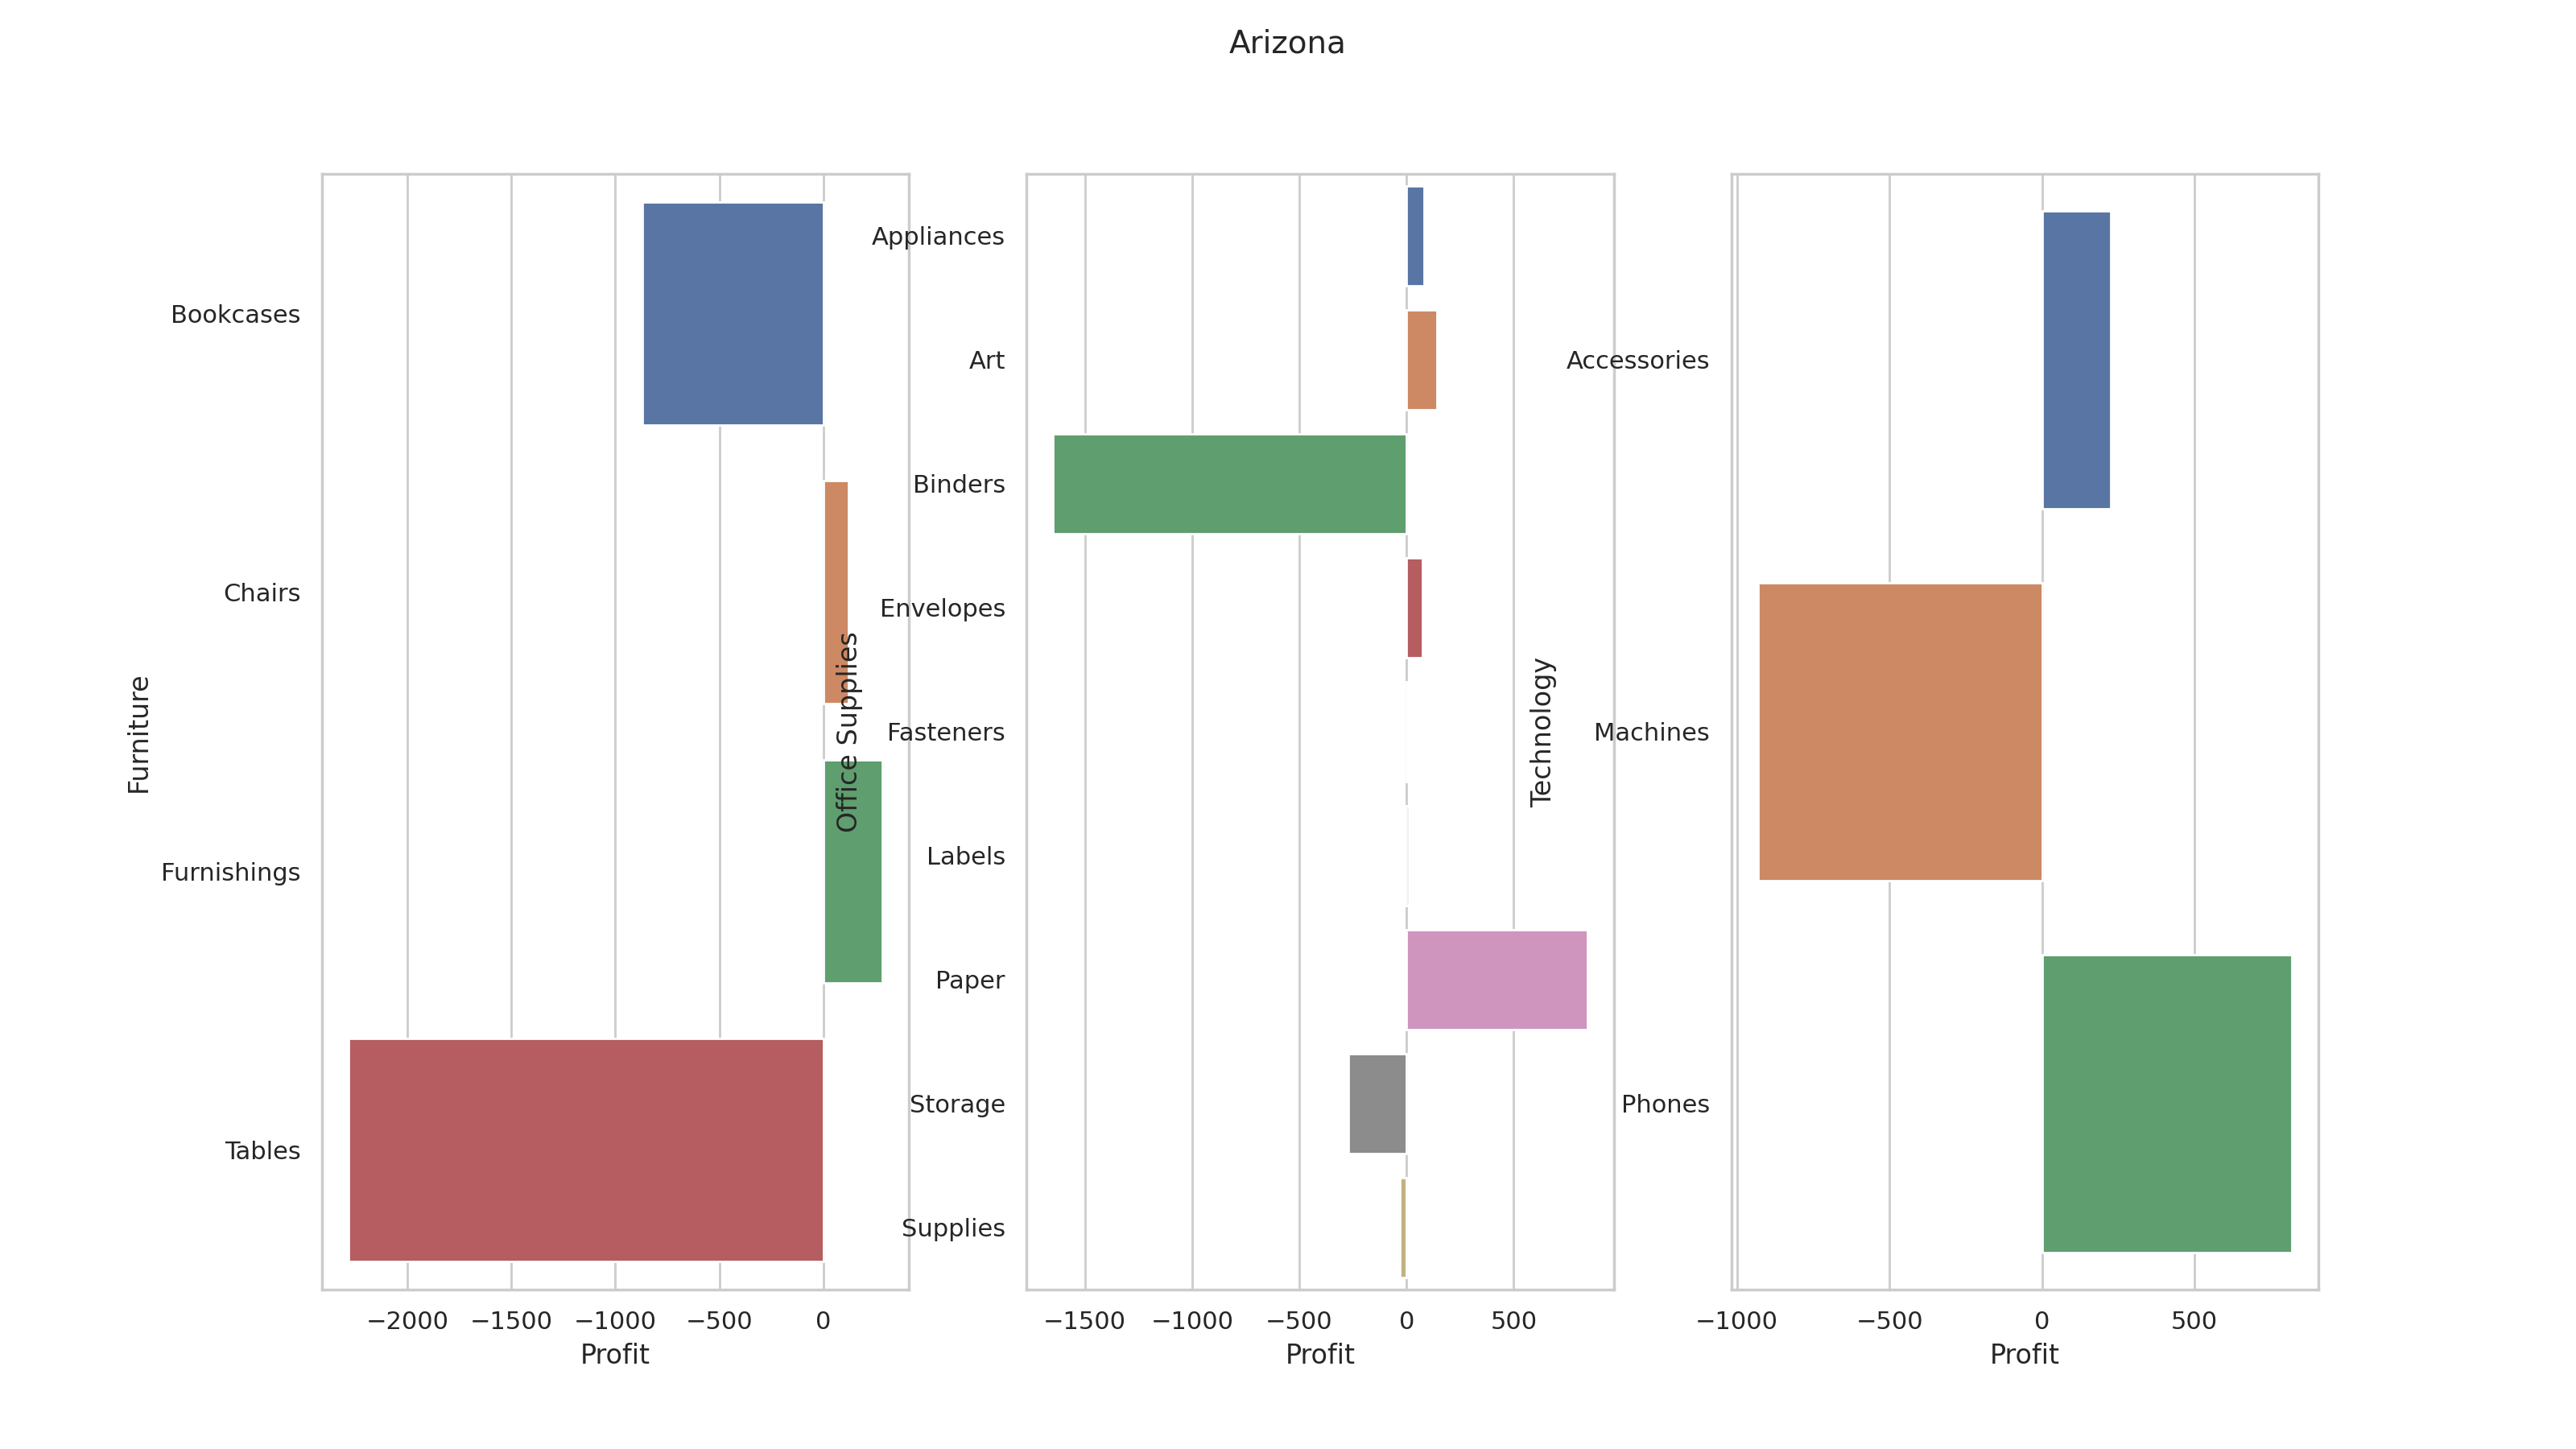

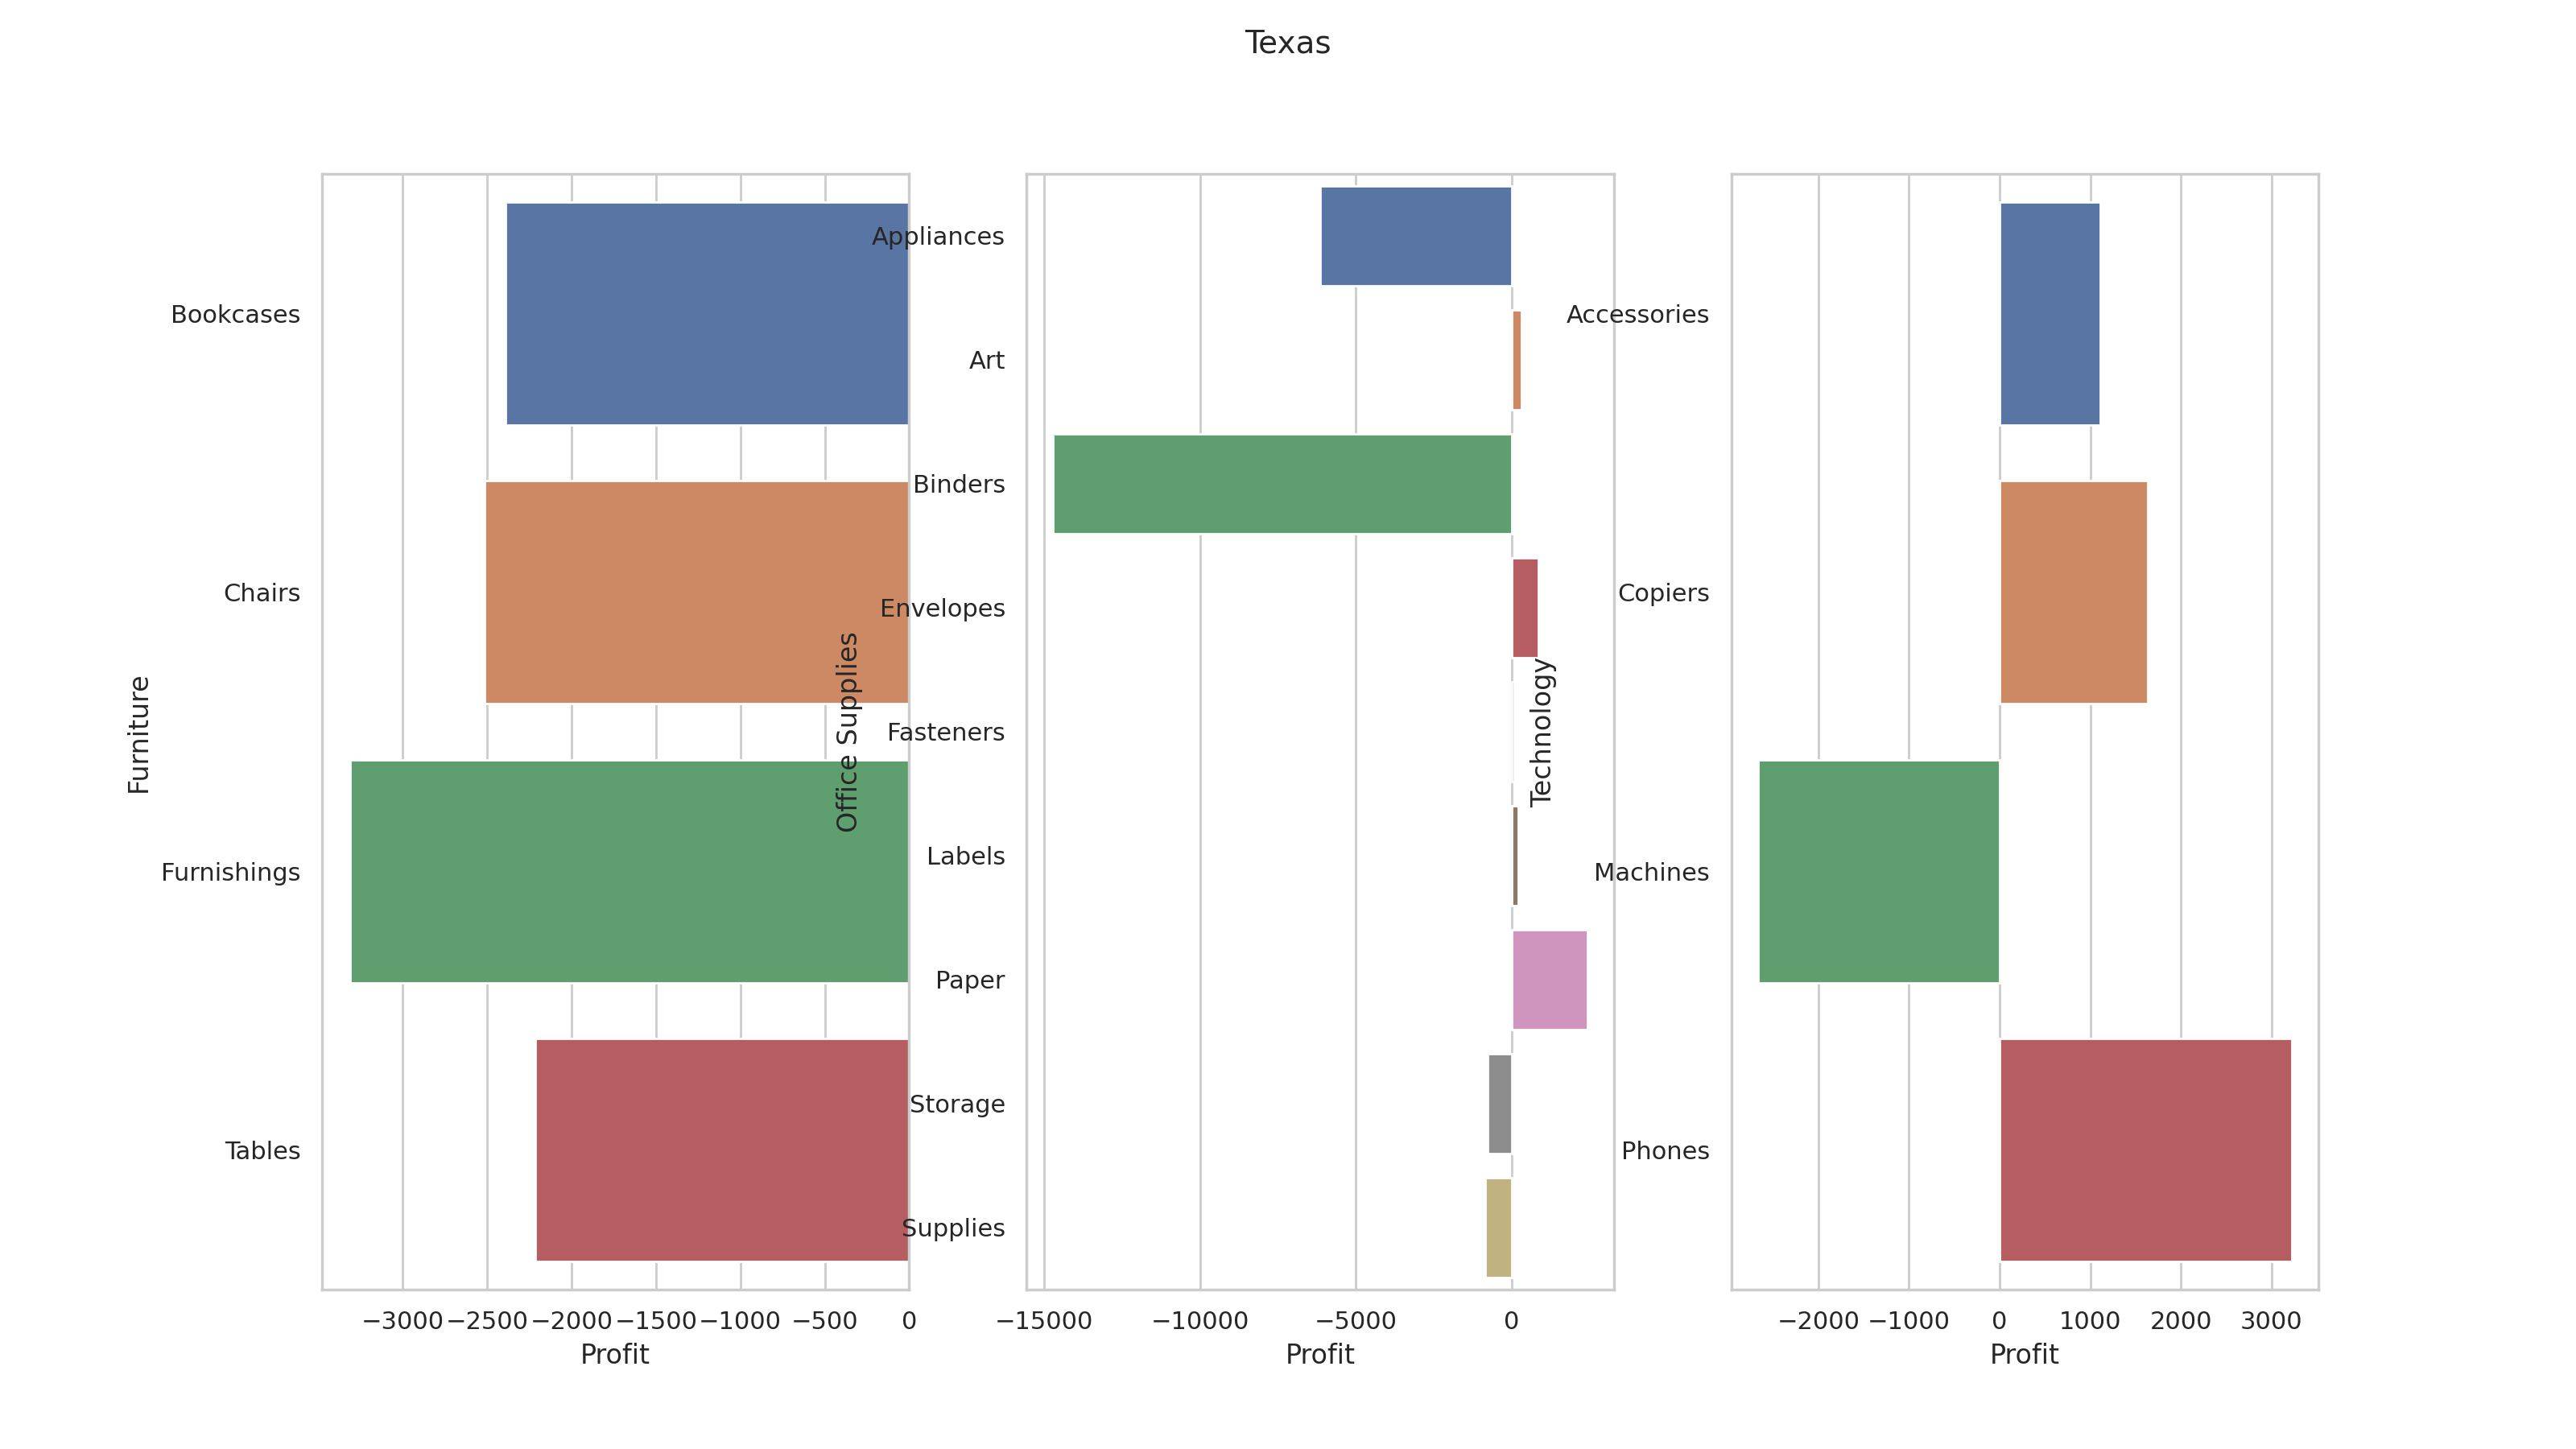

In [31]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

In [32]:
#Using Cluster Analysis(K-Mean Clustering)#
x = data.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)


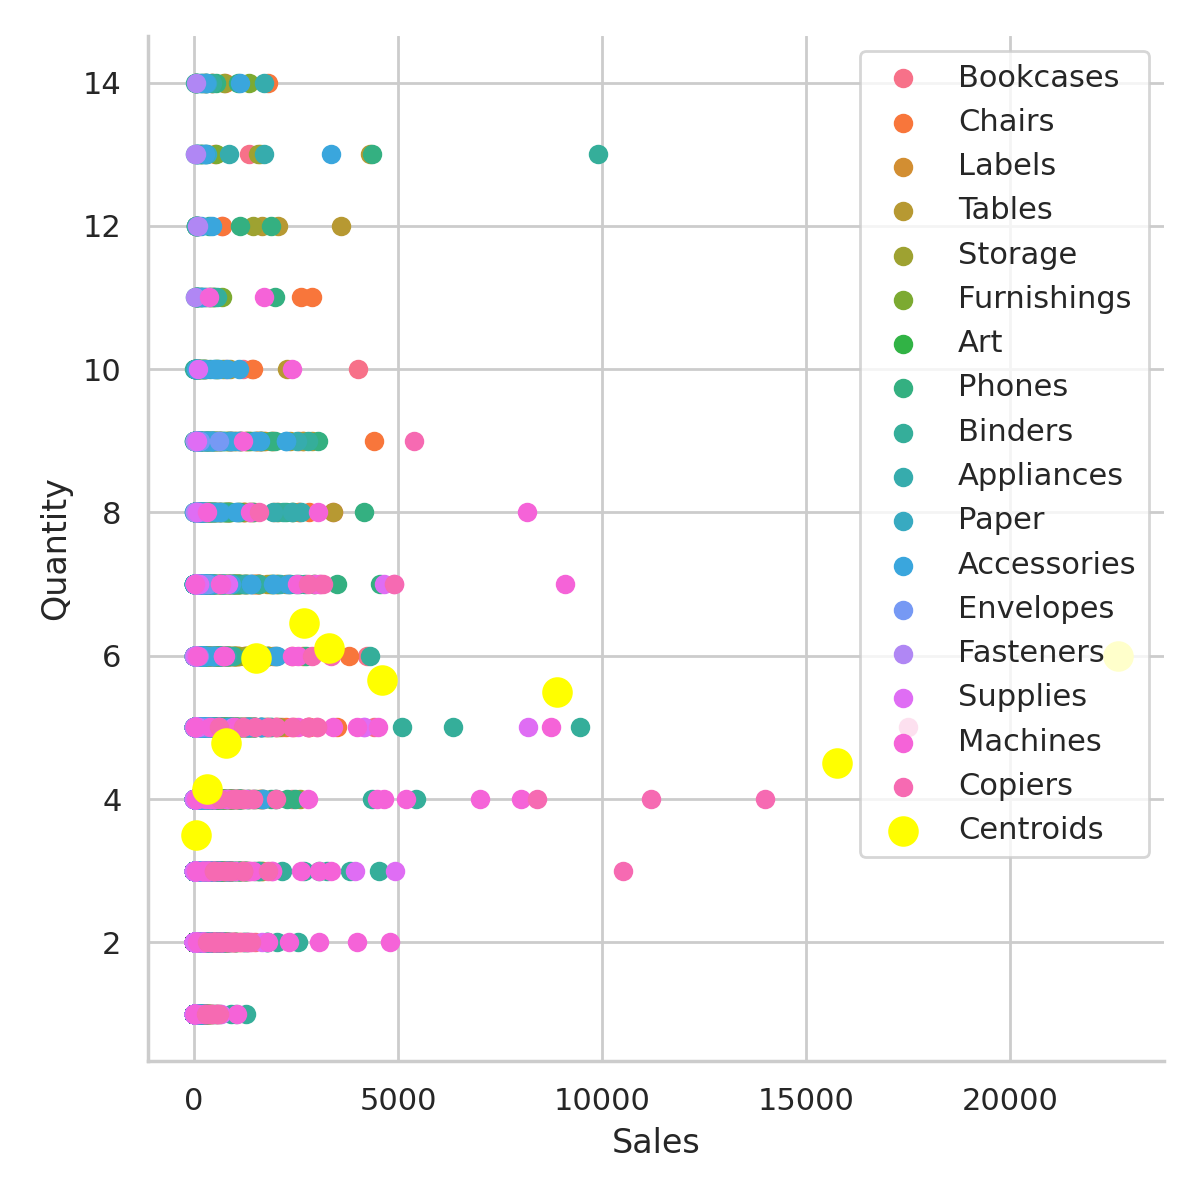

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

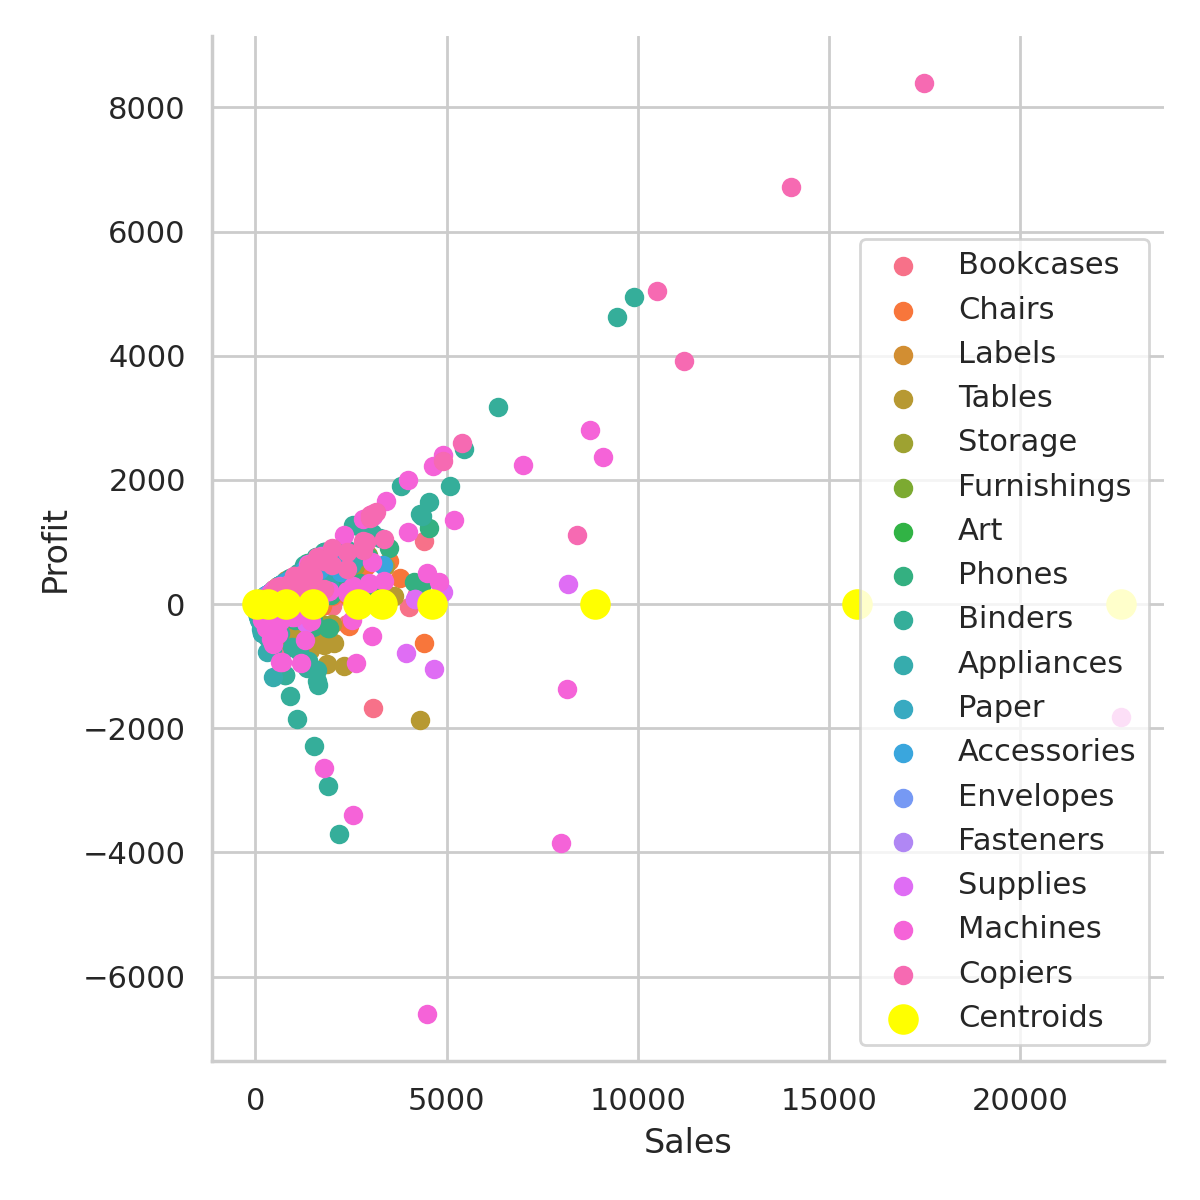

In [34]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

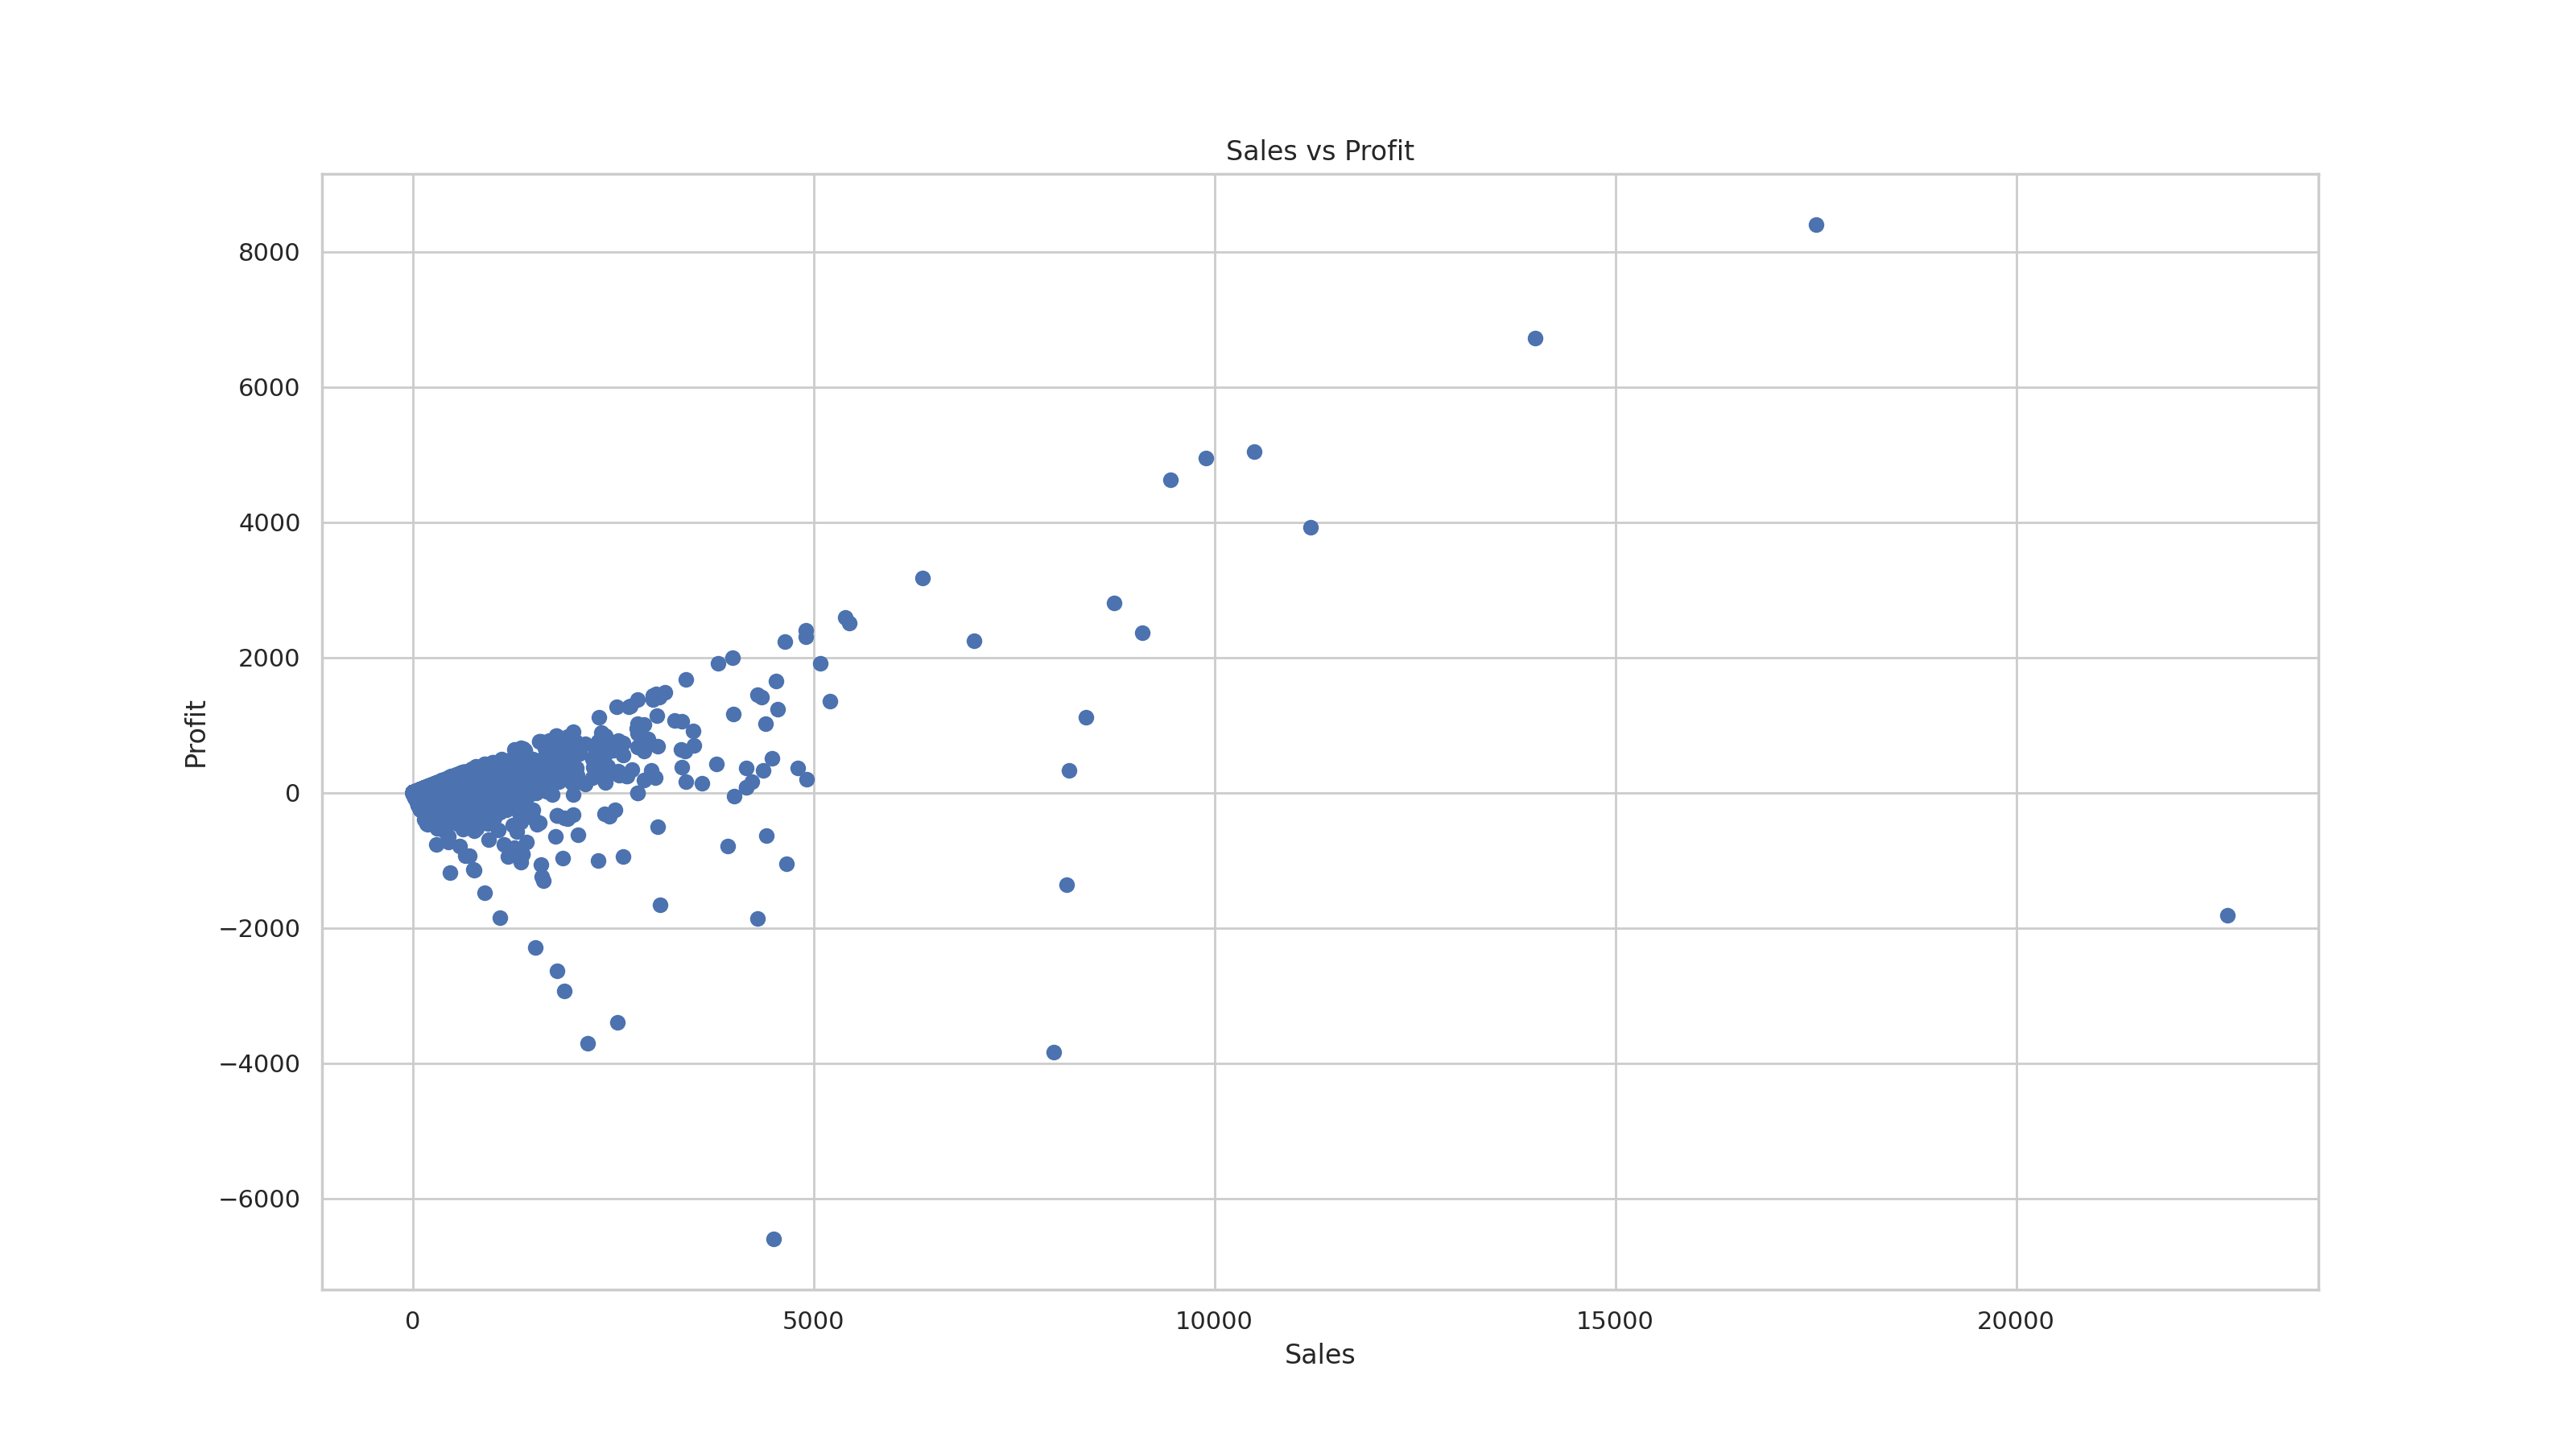

In [35]:
fig, ax = plt.subplots(figsize = (16 , 9))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

After analyzing the data through visualization and clustering, we can discern the regions and product categories where sales and profits are either high or low. To enhance performance in those regions, offering discounts within a specified range could prove beneficial for both the company and consumers. Determining this optimal discount range requires conducting technical analysis, which can be achieved through either Factor Analysis or neural networks.

It's worth noting that even though the superstore experiences losses from providing discounts on its products, discontinuing this practice is not a viable option. The significant discounts are typically offered during festivals, end-of-season sales, and clearance events to create space in the warehouses for new stock. These strategic losses contribute to the company's long-term success by attracting and retaining more customers. Therefore, absorbing minor losses from discounts is an integral part of the company's business strategy.